
# <font color = "Blue"> <B>  Problem Statement: Capstain Project


### <font color = "Navy Blue"> <b> An E Commerce company or churn (you can choose either of these two domains) provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.

<font color = "Blue">**Data Dictionary**

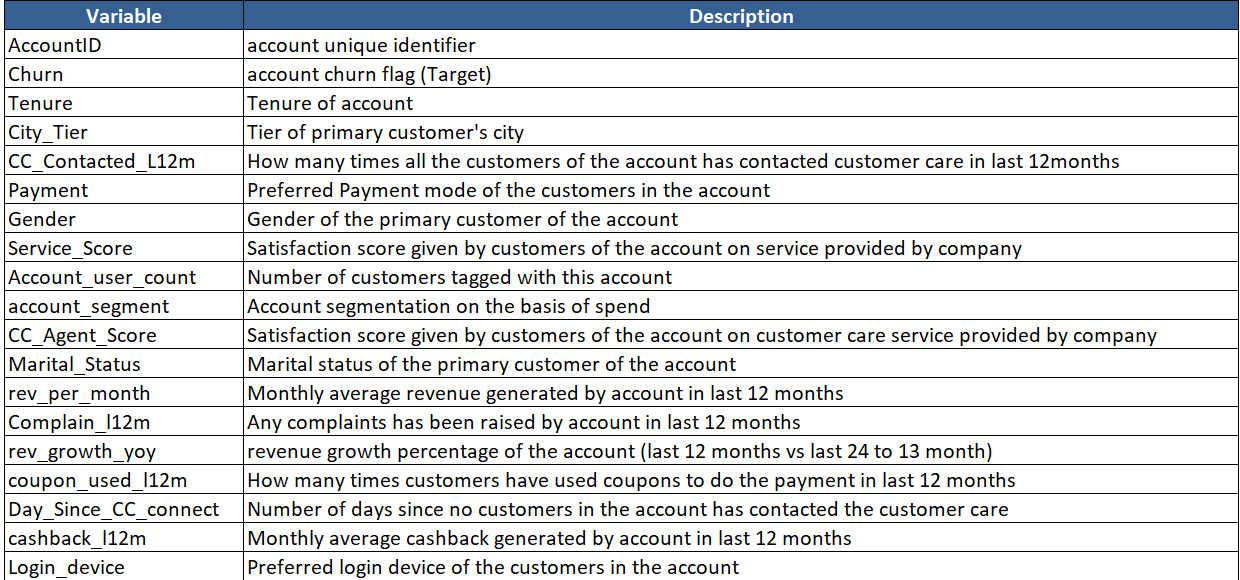

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics,model_selection

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
# To model the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# To model the Bagging classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
# To model the Boosting classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

### <font color = "Blue"> <b> Visual inspection of data (rows, columns, descriptive details)	

**Read the data**

In [2]:
from google.colab import files

In [3]:
import io
uploaded=files.upload()

Saving Customer Churn Data.xlsx to Customer Churn Data.xlsx


In [4]:
churn = pd.read_excel(io.BytesIO(uploaded["Customer Churn Data.xlsx"]),sheet_name="Data for DSBA")
churn.head(10)

AccountID  Churn Tenure  ...  Day_Since_CC_connect  cashback Login_device
0      20000      1      4  ...                     5    159.93       Mobile
1      20001      1      0  ...                     0     120.9       Mobile
2      20002      1      0  ...                     3       NaN       Mobile
3      20003      1      0  ...                     3    134.07       Mobile
4      20004      1      0  ...                     3     129.6       Mobile
5      20005      1      0  ...                     7    139.19     Computer
6      20006      1      2  ...                     0    120.86       Mobile
7      20007      1      0  ...                     0    122.93       Mobile
8      20008      1     13  ...                     2    126.83       Mobile
9      20009      1      0  ...                     1    122.93       Mobile

[10 rows x 19 columns]

In [5]:
churn.shape

(11260, 19)

**Get the info**

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

**Check for Duplicates**

In [7]:
# There is a column with indicating Account ID, which is of no importance while building Data Model
# Hence dropping the first column for further analysis
churn.drop('AccountID',inplace=True,axis=1)

**Get the Summary Statistics**

In [8]:
churn.describe(include='all')

Churn   Tenure  ...  cashback  Login_device
count   11260.000000  11158.0  ...  10789.00         11039
unique           NaN     38.0  ...   5693.00             3
top              NaN      1.0  ...    155.62        Mobile
freq             NaN   1351.0  ...     10.00          7482
mean        0.168384      NaN  ...       NaN           NaN
std         0.374223      NaN  ...       NaN           NaN
min         0.000000      NaN  ...       NaN           NaN
25%         0.000000      NaN  ...       NaN           NaN
50%         0.000000      NaN  ...       NaN           NaN
75%         0.000000      NaN  ...       NaN           NaN
max         1.000000      NaN  ...       NaN           NaN

[11 rows x 18 columns]

####  <font color = "Red"> ** Percentile values of most of the variables suggest presence of NaN values, indicating Data has lot of missing values which may need further treatment basis their data types.
####  <font color = "Red"> ** Mean and Median values of all the variables have fair differences, which indicates data must be skewed.
#### <font color = "Red">** Values of Max values, Min Values compared to 75% and 25%, indicates high number of outliers.
#### <font color = "Red">** Some of the continuous variables is found to be of 'object datatype, suggesting presence of unwanted variables,
#### <font color = "Red">** Gender column is supposed to have only 2 variables, but value count suggest of 4 unique values, suggesting posible renaming of some of the values
#### <font color = "Red">** Lets check for null values, duplicate values, outliers and skewness.

**Check for Null Values**

In [9]:
churn.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### <font color= "Green"> There are lot of null values in the given dataset




Check for Unique values

In [10]:
for feature in churn.columns:
    if churn[feature].dtype == 'object':
        print(feature)
        print(churn[feature].unique())
        print('\n')

Tenure
[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]


Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' 'F' nan 'M']


Account_user_count
[3 4 nan 5 2 '@' 1 6]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']


Marital_Status
['Single' 'Divorced' 'Married' nan]


rev_per_month
[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101
 136 125 14 13 12 115 23 122 117 131 104 15 25 135 111 109 100 103]


rev_growth_yoy
[11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26 '$' 4 27 28]


coupon_used_for_payment
[1 0 4 2 9 6 11 7 12 10 5 3 13 15 8 '#' '$' 14 '*' 16]


Day_Since_CC_connect
[5 0 3 7 2 1 8 6 4 15 nan 11 10 9 13 12 17 16 14 30 '$' 46 18 31 47]


cashback
[159.93 120.9 nan ... 227.36 226.91 191.42]


Login_device
['Mobile' 'Compu

In [11]:
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
60       2
51       2
31      96
25     114
29     114
#      116
26     122
27     131
99     131
28     137
30     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
5      403
4      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

### <font color = "Blue"> <b>Understanding of attributes (variable info, renaming if required)

In [12]:
churn['Gender']= churn['Gender'].replace({'M':'Male', 'F':'Female'})
churn['account_segment']=churn['account_segment'].replace({'Regular +':'Regular Plus', 'Super +':'Super Plus'})


### <font color = "Blue"> <b>Removal of unwanted variables (if applicable)

In [13]:
feature=churn.select_dtypes(include=['object']).columns
for i in range(0,len(feature)):
  churn[feature[i]]= churn[feature[i]].replace({'@':np.nan,'#':np.nan,'+':np.nan,'$':np.nan,'*':np.nan,'&&&&':np.nan})
    

In [14]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [15]:
for feature in churn.columns:
    if churn[feature].dtype == 'object':
        print(feature)
        print(churn[feature].unique())
        print('\n')

Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


Gender
['Female' 'Male' nan]


account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' nan 'Super Plus']


Marital_Status
['Single' 'Divorced' 'Married' nan]


Login_device
['Mobile' 'Computer' nan]




### <font color = "Blue"> <b> Description of data without null values (New Data Set only for description purpose)

In [16]:
churn_nonull=churn.copy()


In [17]:
churn_nonull.dropna(axis=0,inplace=True)


In [18]:
churn_nonull.describe(include='all').T

count unique           top  ...     50%     75%     max
Churn                    8249    NaN           NaN  ...       0       0       1
Tenure                   8249    NaN           NaN  ...       9      16      99
City_Tier                8249    NaN           NaN  ...       1       3       3
CC_Contacted_LY          8249    NaN           NaN  ...      16      23     132
Payment                  8249      5    Debit Card  ...     NaN     NaN     NaN
Gender                   8249      2          Male  ...     NaN     NaN     NaN
Service_Score            8249    NaN           NaN  ...       3       3       5
Account_user_count       8249    NaN           NaN  ...       4       4       6
account_segment          8249      5  Regular Plus  ...     NaN     NaN     NaN
CC_Agent_Score           8249    NaN           NaN  ...       3       4       5
Marital_Status           8249      3       Married  ...     NaN     NaN     NaN
rev_per_month            8249    NaN           NaN  ...       5       7     140
Complain_ly              8249    NaN           NaN  ...       0       1       1
rev_growth_yoy           8249    NaN           NaN  ...      15      19      28
coupon_used_for_payment  8249    NaN           NaN  ...       1       2      16
Day_Since_CC_connect     8249    NaN           NaN  ...       3       8      47
cashback                 8249    NaN           NaN  ...  164.68  198.88  331.26
Login_device             8249      2        Mobile  ...     NaN     NaN     NaN

[18 rows x 11 columns]

## <font color = "Blue"> <b>Exploratory data analysis

####   <font color='Blue'> <b>Uni-variate analysis

In [19]:
churn.select_dtypes(exclude=['object']).columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback'],
      dtype='object')

In [20]:
# Lets import random colors list for plotting 
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0,0xFFFFFF),range(n)))
color_list=get_colors(13)
color_list

['#a1a109',
 '#caea6a',
 '#52fd08',
 '#82c398',
 '#bdfceb',
 '#d9eba5',
 '#5db209',
 '#729633',
 '#0a62e7',
 '#b68de2',
 '#130dfc',
 '#e0d2ea',
 '#237144']

In [21]:
churn.select_dtypes(exclude=['object']).columns.size

13

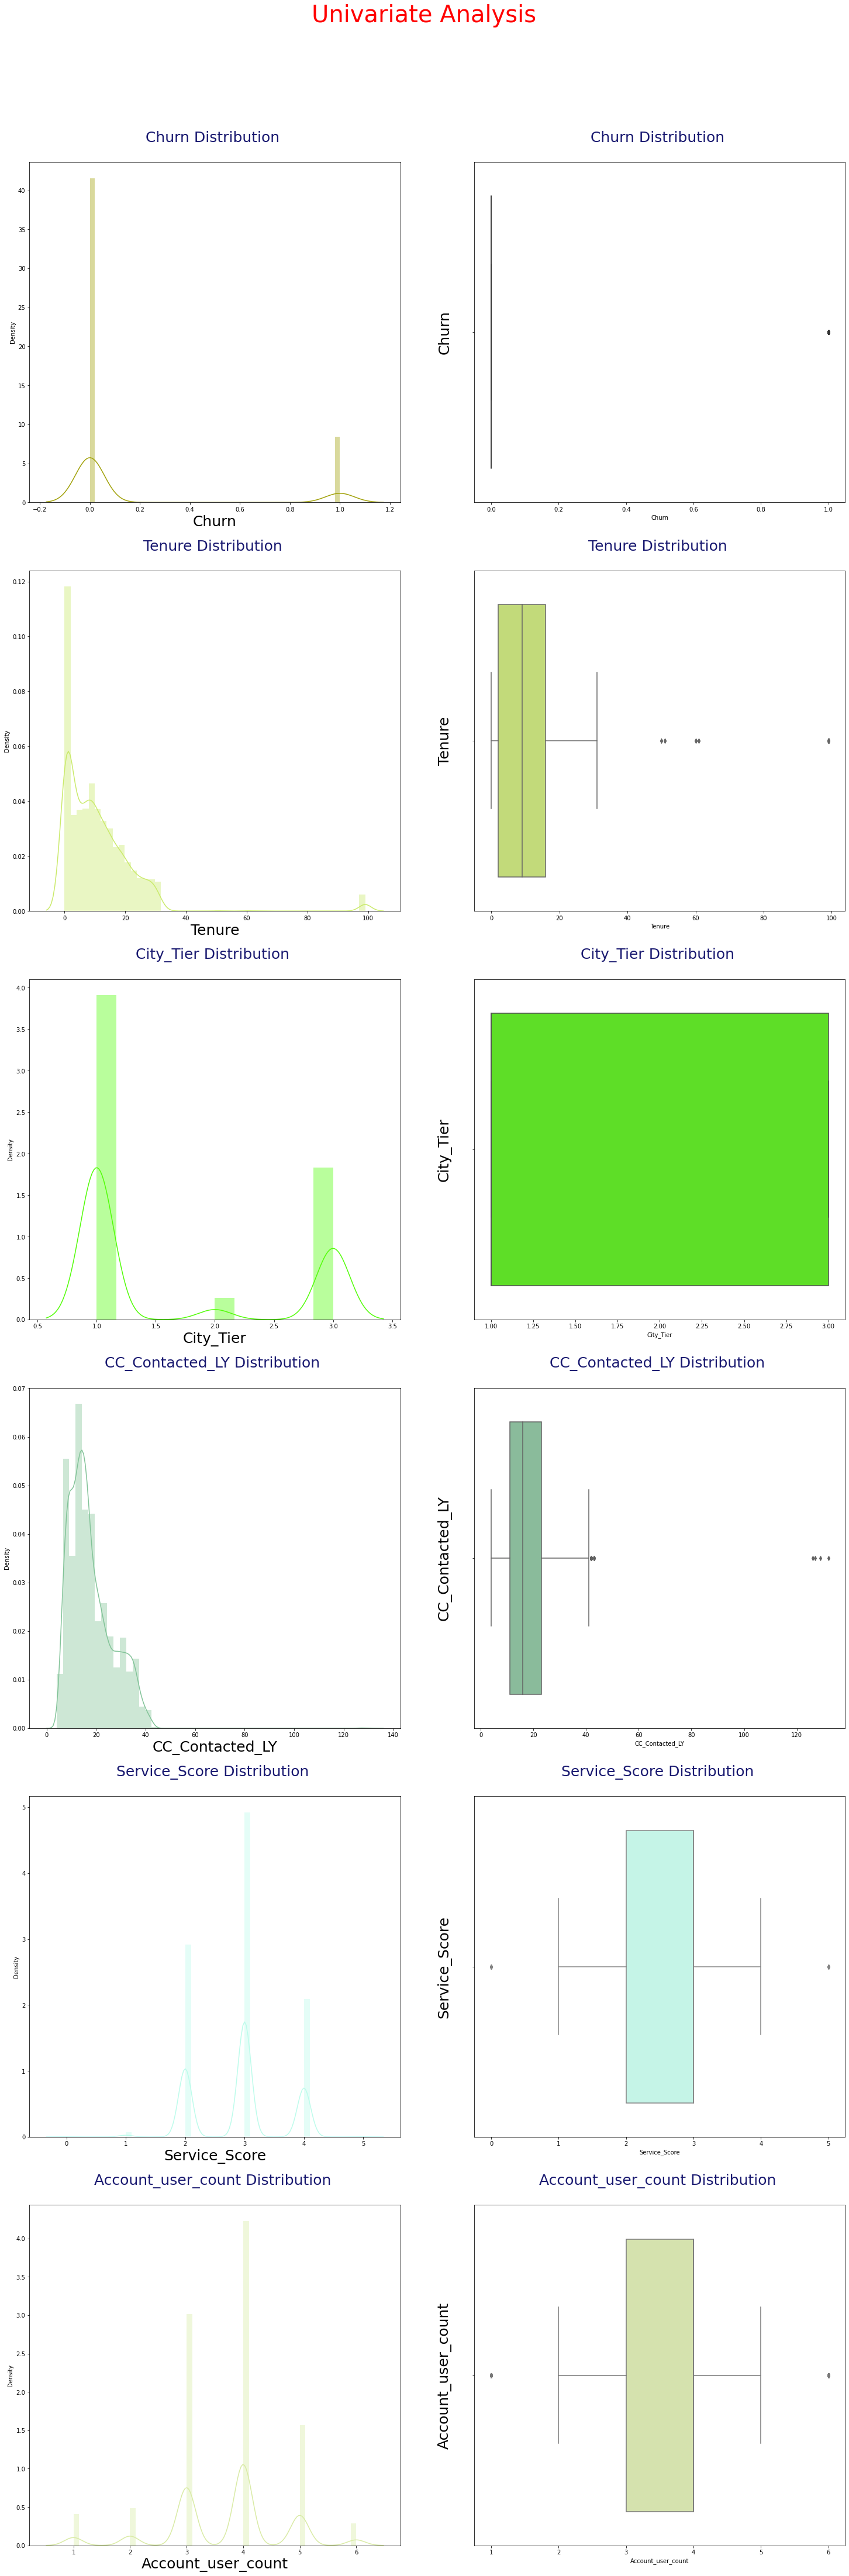

In [22]:
var1=churn.select_dtypes(exclude=['object']).columns
fig, axes = plt.subplots(nrows=6,ncols=2)
n=churn.select_dtypes(exclude=['object']).columns.size
fig.set_size_inches(25, 75);
plt.suptitle('Univariate Analysis',fontsize=40, color='Red',y=0.93);
for i in range(0,6):
    a = sns.distplot(churn[var1].iloc[:,i] , ax=axes[i][0],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_xlabel(var1[i],fontsize=25)
    a = sns.boxplot(churn[var1].iloc[:,i] , orient = "v" , ax=axes[i][1],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_ylabel(var1[i]+'\n',fontsize=25);

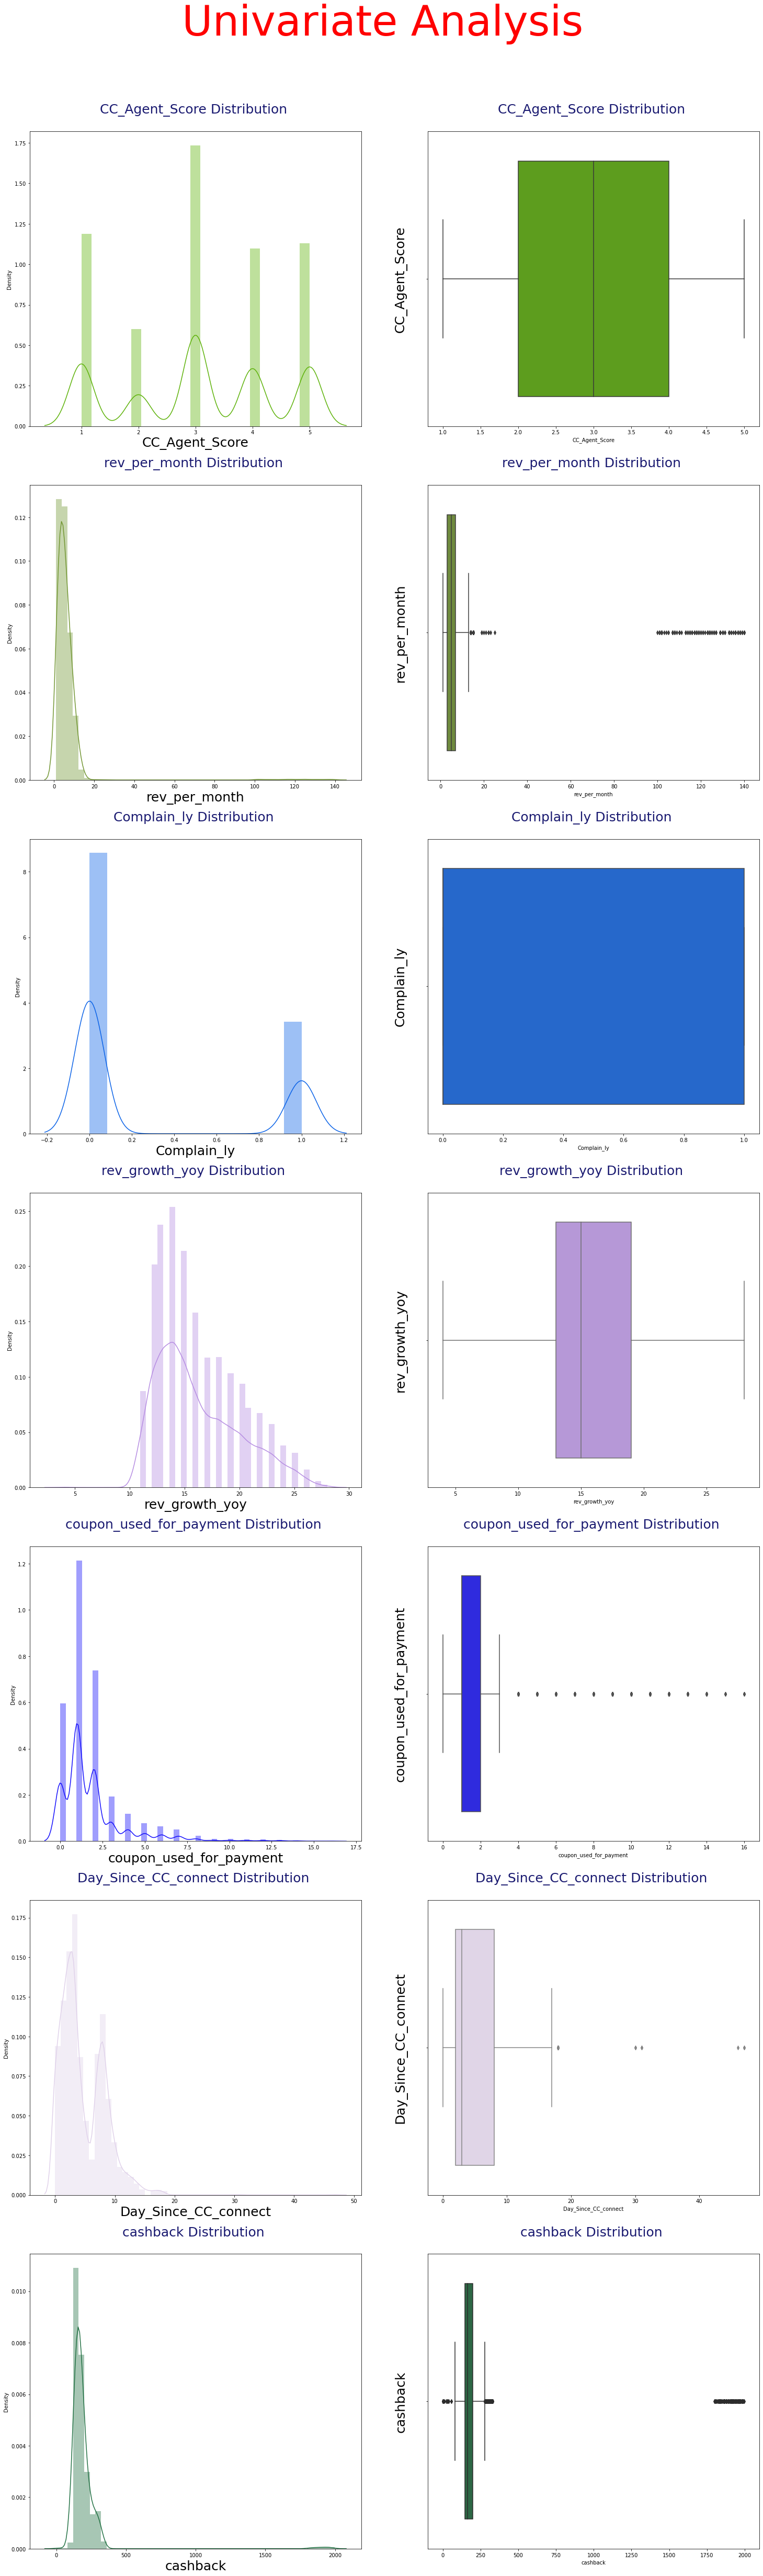

In [23]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25, 85);
plt.suptitle('Univariate Analysis',fontsize=80, color='Red',y=0.92);
for i in range(6,n):
    a = sns.distplot(churn[var1].iloc[:,i] , ax=axes[i-6][0],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_xlabel(var1[i],fontsize=25);
    a = sns.boxplot(churn[var1].iloc[:,i] , orient = "v" , ax=axes[i-6][1],color=color_list[i]);
    a.set_title(var1[i] + " Distribution \n",fontsize=25,color='#191970');
    a.set_ylabel(var1[i]+"\n",fontsize=25);

In [24]:
churn.skew()

Churn                      1.772606
Tenure                     3.895707
City_Tier                  0.737107
CC_Contacted_LY            1.422977
Service_Score              0.003891
Account_user_count        -0.393100
CC_Agent_Score            -0.142149
rev_per_month              9.093909
Complain_ly                0.950876
rev_growth_yoy             0.752474
coupon_used_for_payment    2.575199
Day_Since_CC_connect       1.273021
cashback                   8.770766
dtype: float64

### <font color = "Sky Blue"> ** We observe from the plots that the variables 'Tenure', ,'CC_Contacted_LY', 'Service_Score','Account_user_count', 'rev_per_month','rev_growth_yoy', coupon_used_for_payment', 'Day_Since_CC_connect','cashback' have outliers

### <font color = "Sky Blue"> ** Also the data in case of all variables are skewed, in either direction

### <font color = "Sky Blue"> ** Data in its original form may not follow normal distribution


####   <font color='Blue'><b> Multi  - Variate Analysis:

In [25]:
# Check for correlation of variable
churn.corr(method='pearson')

Churn    Tenure  ...  Day_Since_CC_connect  cashback
Churn                    1.000000 -0.233150  ...             -0.147956 -0.032382
Tenure                  -0.233150  1.000000  ...              0.122612  0.078416
City_Tier                0.084135 -0.030223  ...              0.023158  0.010516
CC_Contacted_LY          0.072071 -0.004261  ...              0.012938  0.002679
Service_Score            0.008991  0.009608  ...              0.099770  0.042961
Account_user_count       0.107292 -0.004052  ...              0.037573  0.037057
CC_Agent_Score           0.105796 -0.020031  ...              0.030808 -0.012599
rev_per_month            0.022538  0.028431  ...             -0.000923  0.002974
Complain_ly              0.251488 -0.021419  ...             -0.041111  0.008734
rev_growth_yoy          -0.013877  0.018824  ...              0.002206 -0.001157
coupon_used_for_payment -0.014826  0.089171  ...              0.361735  0.072861
Day_Since_CC_connect    -0.147956  0.122612  ...              1.000000  0.084465
cashback                -0.032382  0.078416  ...              0.084465  1.000000

[13 rows x 13 columns]

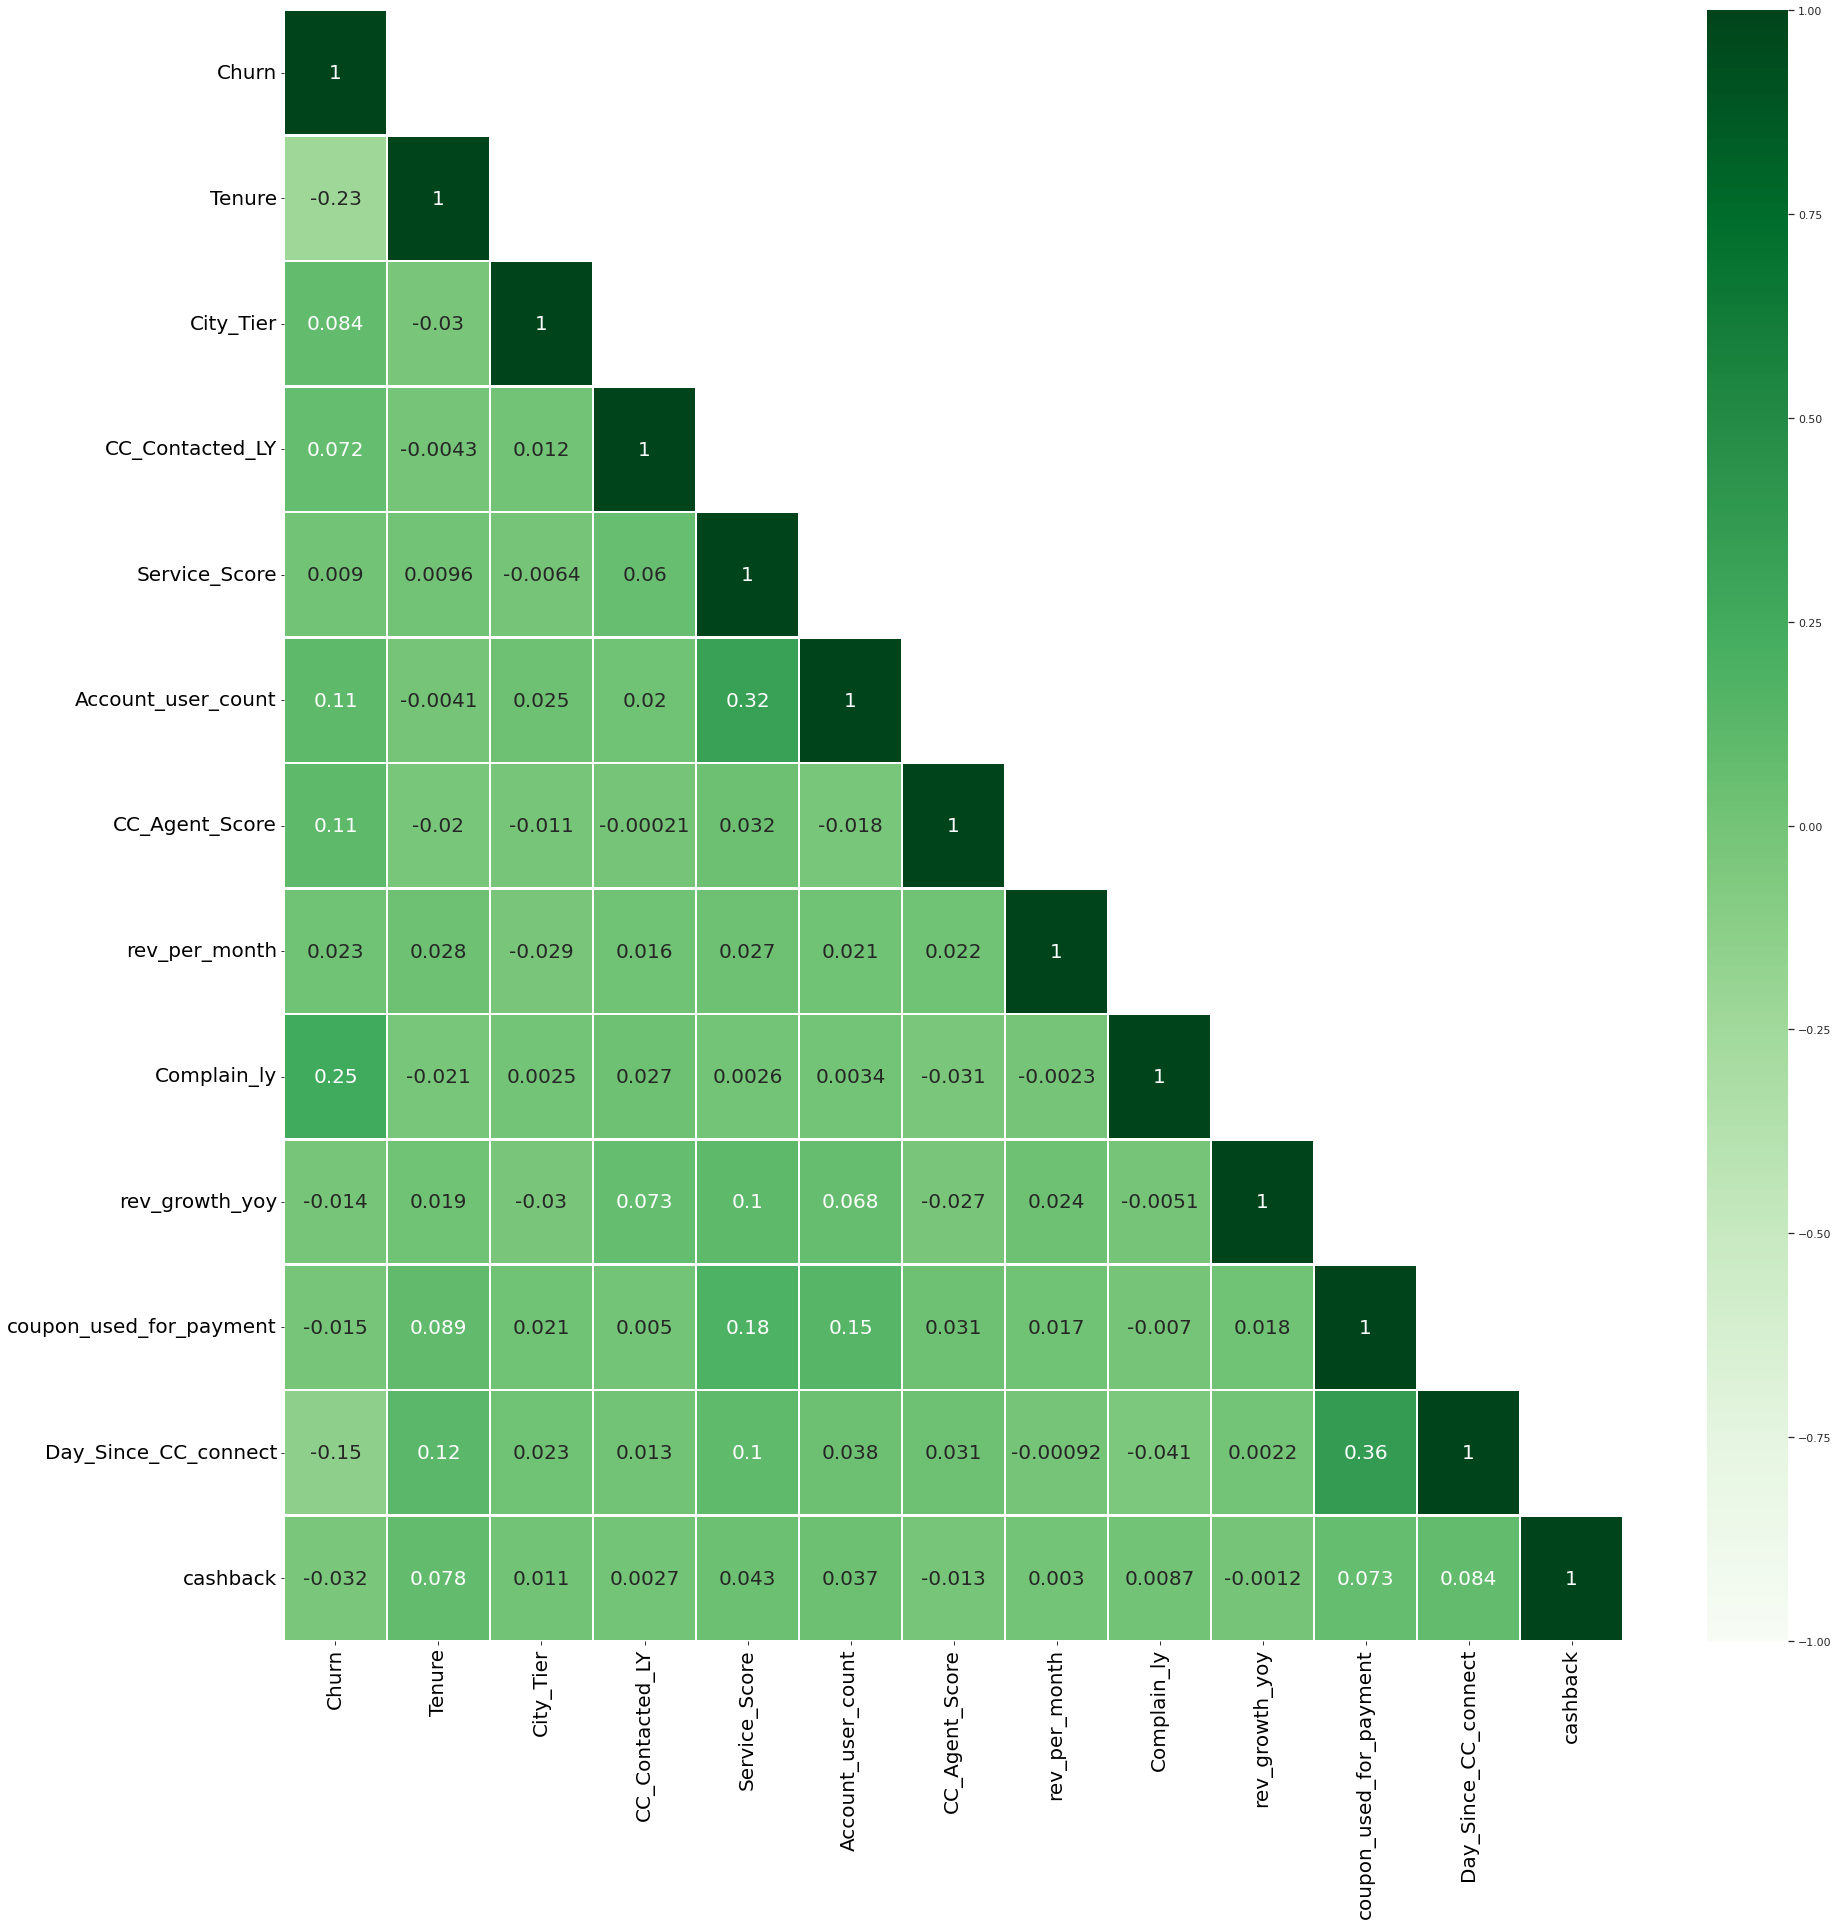

In [26]:
cor = churn.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(30,30))
sns.set(font_scale=1)
sns.heatmap(cor, mask = mask, annot = True,annot_kws={"size": 20},linewidths=1.5,
            linecolor='white',cmap='Greens', vmin = -1, vmax = 1);
plt.yticks(fontsize="20",va='center');
plt.xticks(fontsize="20",ha='center');

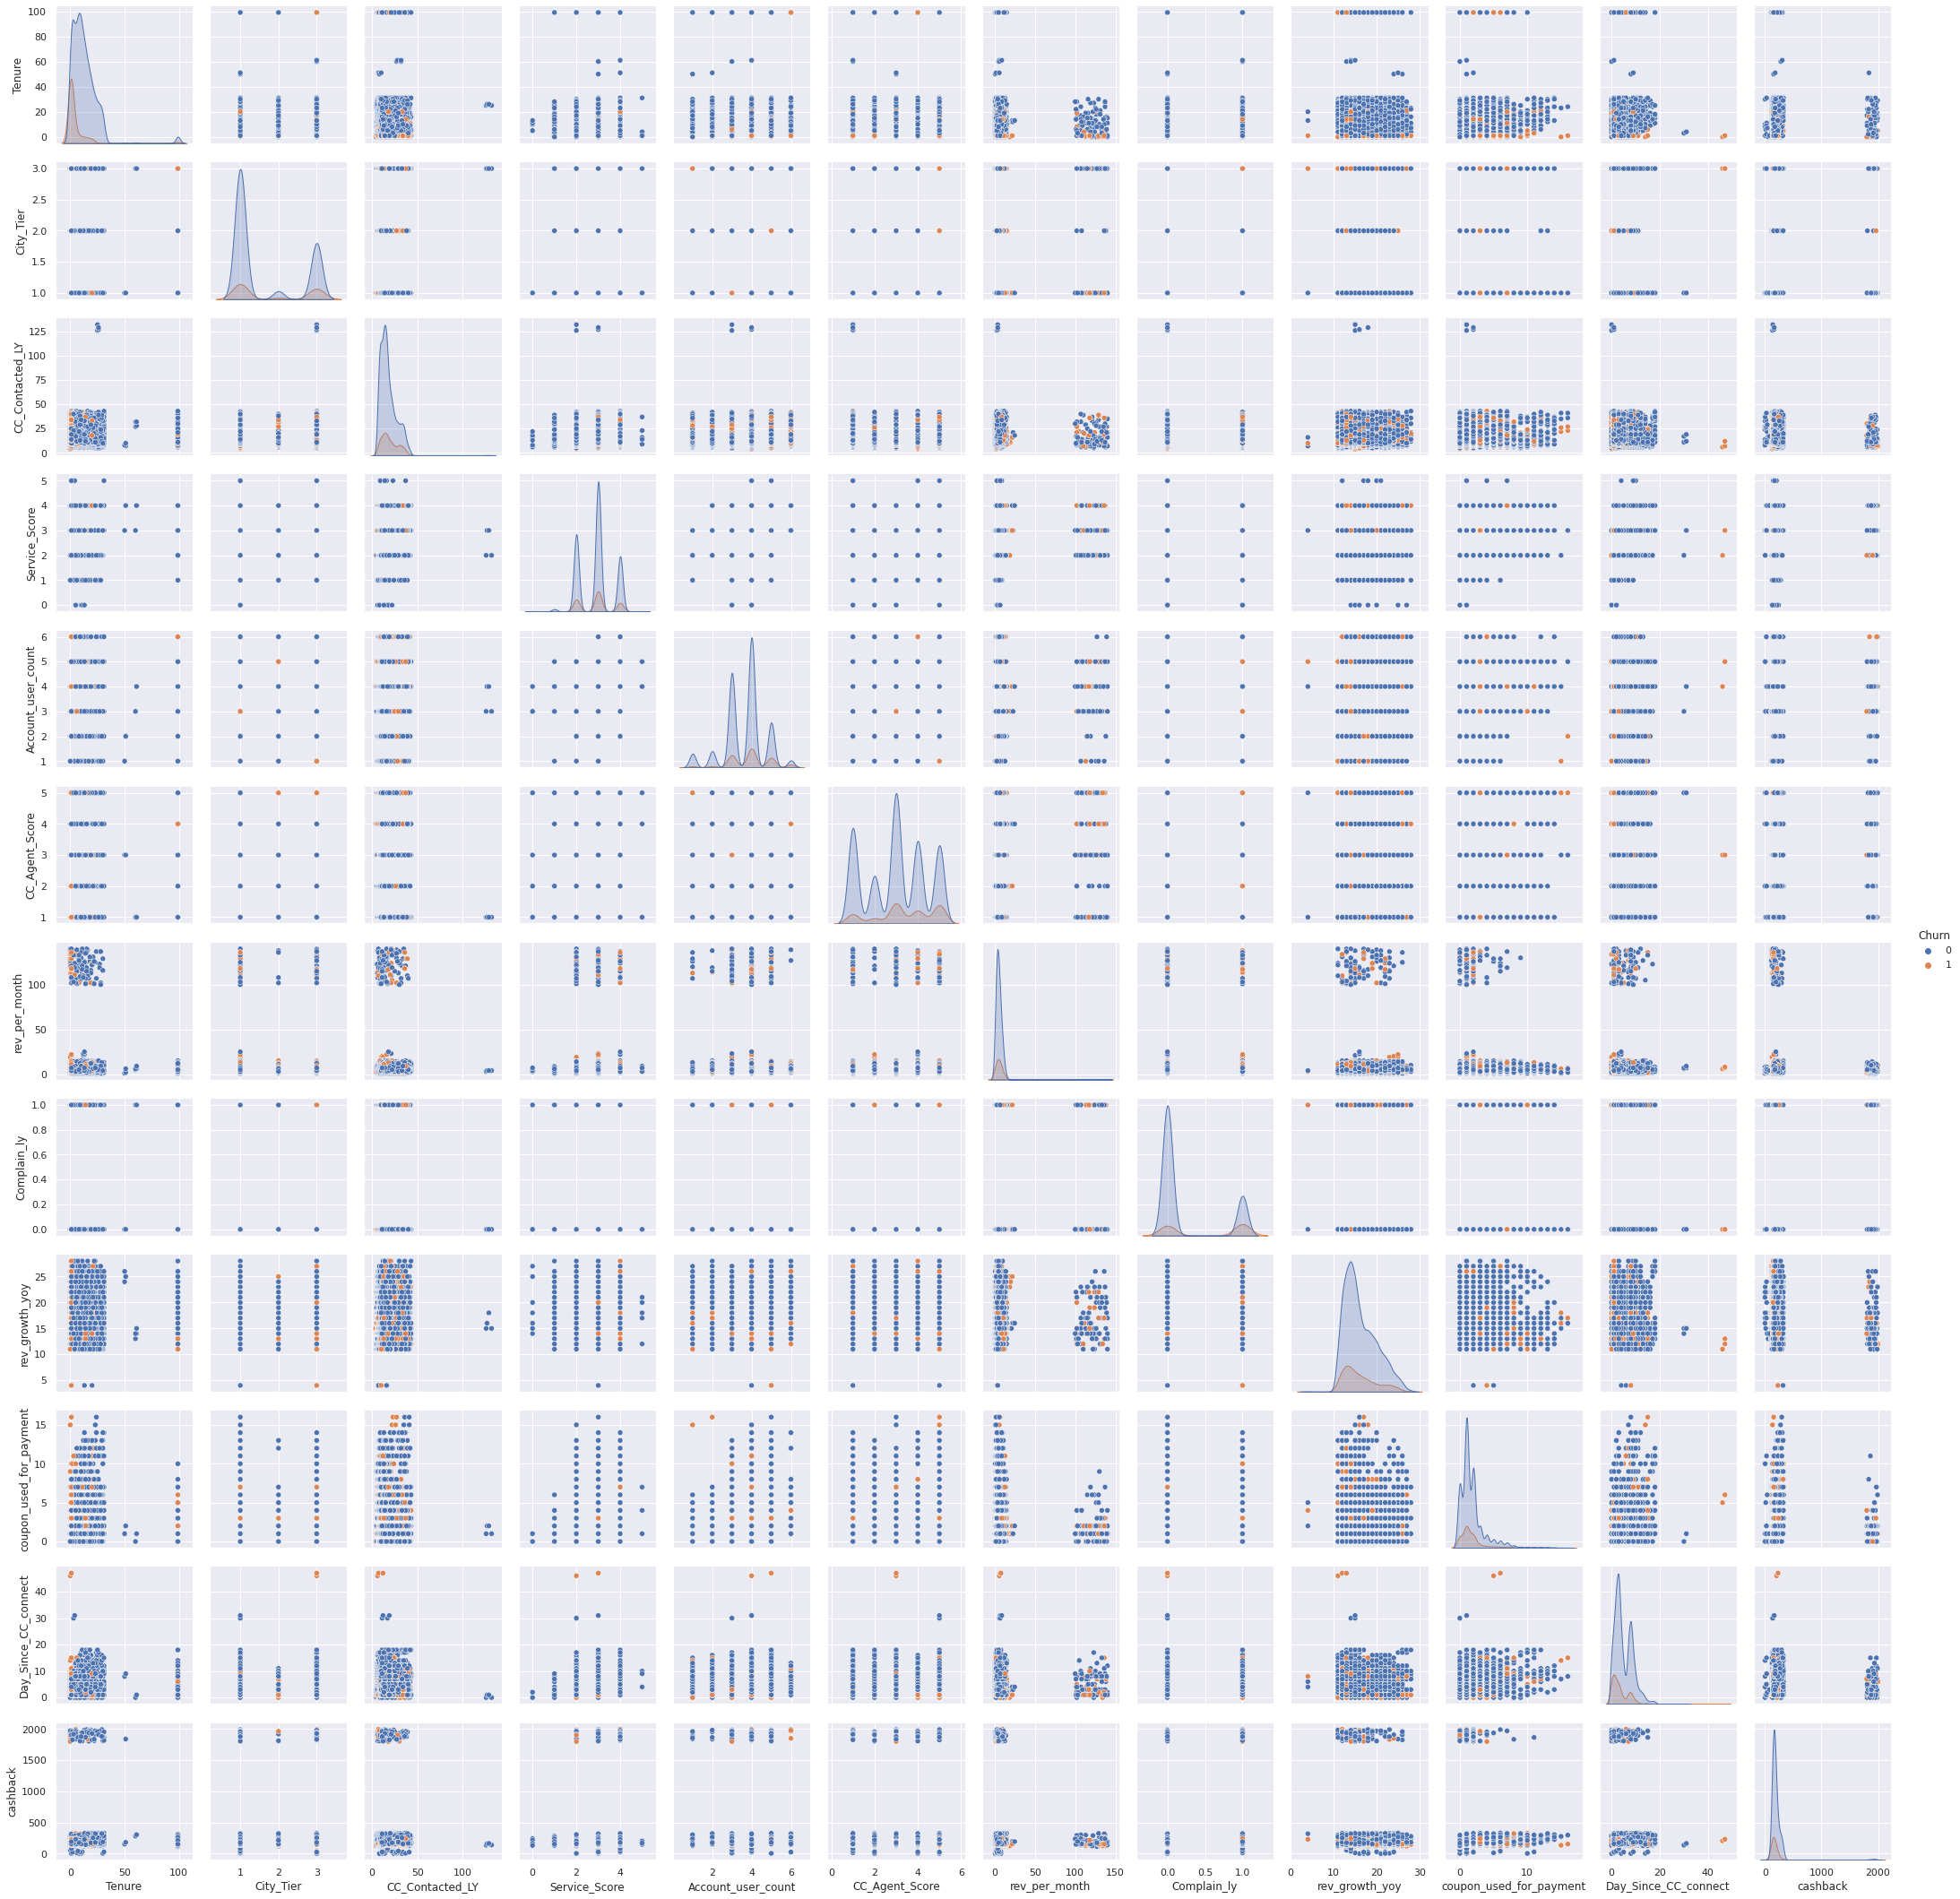

In [27]:
sns.pairplot(churn,hue="Churn", diag_kind='kde',);

### <font color="Green"> ** Independent features among each other shows very less collinearity 




####   <font color='Blue'> <b>Bi- Variate Analysis of Target variable with Independent Features

####   <font color='Red'> <B> Churn vs City_Tier

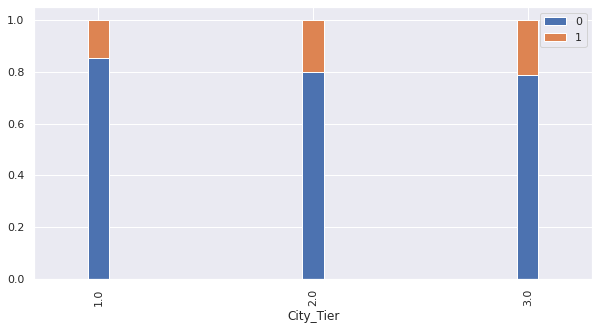

In [28]:
df= churn.groupby('City_Tier')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(10,5), width=0.1)
plt.legend(loc='upper right');

### <font color="Green"><i>The consumers belonging to Tier 1 cities churns less compared to Tier 2 and Tier 3 cities. The Tier 3 cities show the maximum impact in churn ratio, possibly, due to the lack of infrastructure development and customer service delays and may be preferring the traditional local owned cable operators to DTH connections.

####   <font color='Red'> <B> Churn vs CC_Contacted_LY

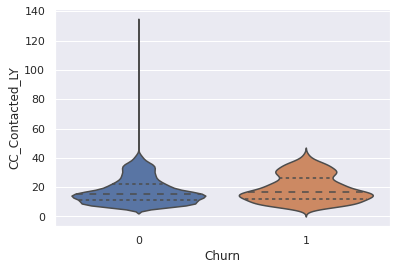

In [29]:
sns.violinplot(churn['Churn'],churn['CC_Contacted_LY'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Green"><i>The consumers who have contacted Customer care in around 35 or more time seems to be churning more. However above feature does not suggest significant difference pattern of churning among customers with those who do not churn

####   <font color='Red'> <B> Churn vs Payment

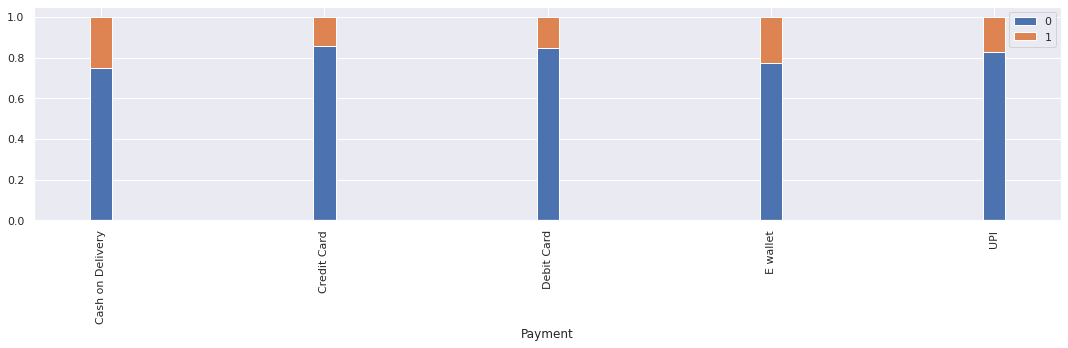

In [30]:
df= churn.groupby('Payment')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(15,5), width=0.1)
plt.tight_layout()
plt.legend(loc='upper right');

### <font color="Green"><i>The consumers with payment modes ‘Cash On Delivery’ and ‘E wallet’ have churned inflated more than the ones using ‘Credit/Debit Cards’ and ‘UPI’. This signifies that the consumers using ‘Credit/Debit Cards’ and ‘UPI’ have had the privilege of cashback offers and points added post each transactions whereas the other two payment mode does not offer any kind of monetary benefit.

####   <font color='Red'> <B> Churn vs Gender

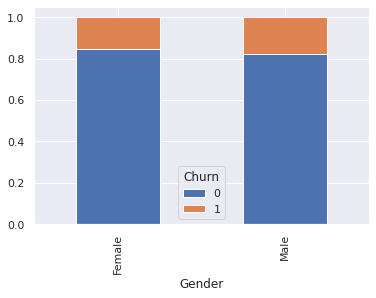

In [31]:
df= churn.groupby('Gender')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True)

### <font color="Green"><i>There is not much significant difference in percentage of churning customers among both the genders.

####   <font color='Red'> <B> Churn vs Service_Score

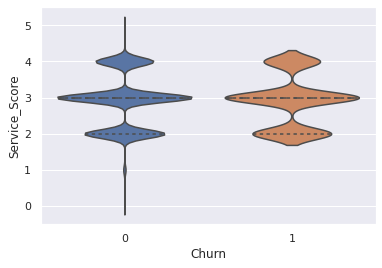

In [32]:
sns.violinplot(churn['Churn'],churn['Service_Score'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

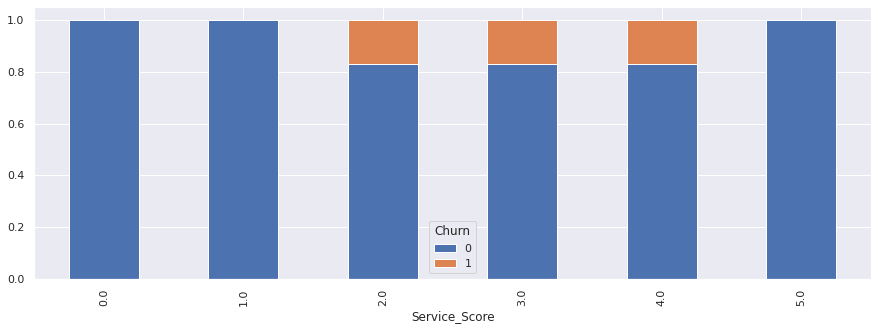

In [33]:
df= churn.groupby('Service_Score')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(15,5), width=0.5);

### <font color="Green"><i>The consumers who have rated the service score from 2.0 – 4.0 are the ones who are more likely to churn compared to the ones given the lowest rating. The consumers with medium satisfaction rate might have been the ones having high contact ratio and the service score rates have been aggregated.

####   <font color='Red'> <B> Churn vs Account_user_count

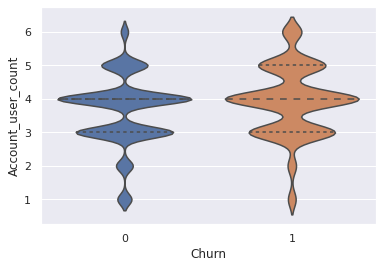

In [34]:
sns.violinplot(churn['Churn'],churn['Account_user_count'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

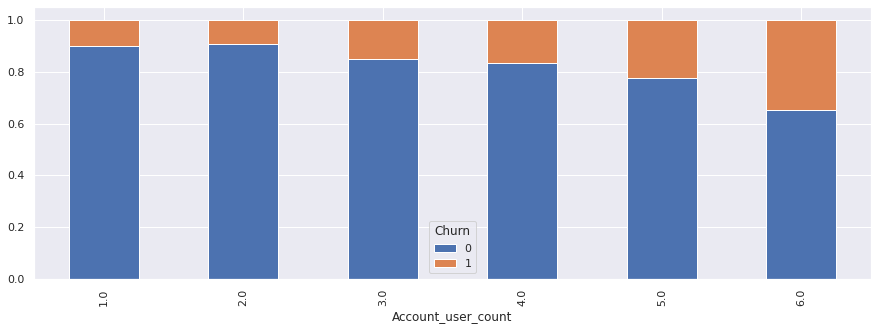

In [35]:
df= churn.groupby('Account_user_count')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(15,5), width=0.5);

### <font color="Green"><i>The churn proportion can be seen higher in case of 6 users for a single account which indicates that the account might be shared by friends/relatives dividing the monetary expense in return and common scenarios have been observed that shared accounts get dissolved easily due to personal clashes, financial factors and others.

####   <font color='Red'> <B> Churn vs account_segment

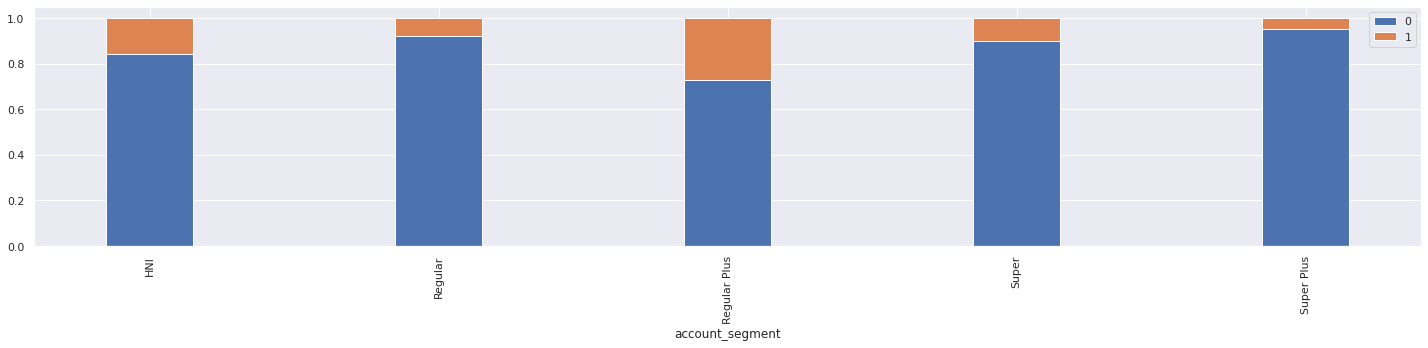

In [36]:
df= churn.groupby('account_segment')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(20,5), width=0.3)
plt.tight_layout()
plt.legend(loc='upper right');

### <font color="Green"><i>The customers using Regular Plus accounts seem to be churning more among others, possibly due to inadequate feature when compared to premiums

####   <font color='Red'> <B> Churn vs CC_Agent_Score

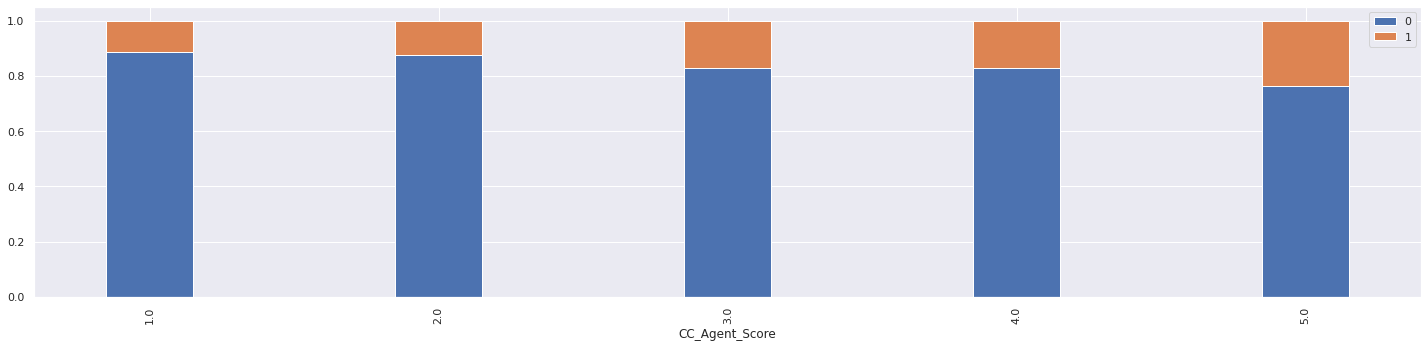

In [37]:
df= churn.groupby('CC_Agent_Score')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(20,5), width=0.3)
plt.tight_layout()
plt.legend(loc='upper right');

### <font color="Green"><i>

####   <font color='Red'> <B> Churn vs Account_user_count

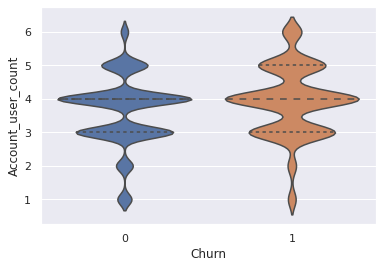

In [38]:
sns.violinplot(churn['Churn'],churn['Account_user_count'],inner='quartile',scale='width',orient='vertical',scale_hue=True)

####   <font color='Red'> <B> Churn vs Marital_Status

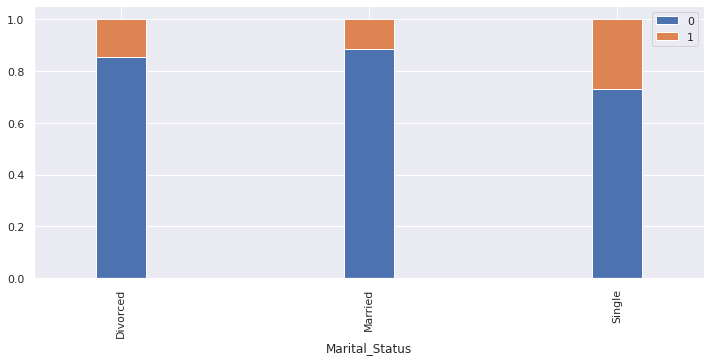

In [39]:
df= churn.groupby('Marital_Status')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(12,5), width=0.2)
plt.legend(loc="Upper Right")

### <font color="Green"><i>The consumers belonging to the ‘Single’ and ‘Divorced’ category of marital status have churned more compared to the married consumers. The ratio of churning is sky-high in single consumers, perhaps, due to the fact that this segment is inclining more towards OTT platforms rather than relying on DTH.

####   <font color='Red'> <B> Churn vs rev_per_month

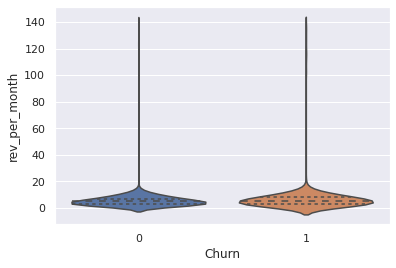

In [40]:
sns.violinplot(churn['Churn'],churn['rev_per_month'],inner='quartile',scale='width',orient='vertical',scale_hue=True);


### <font color="Green"><i>The revenue generated per month does not indicate significant pattern among churners and non-churners

####   <font color='Red'> <B> Churn vs Complain_ly

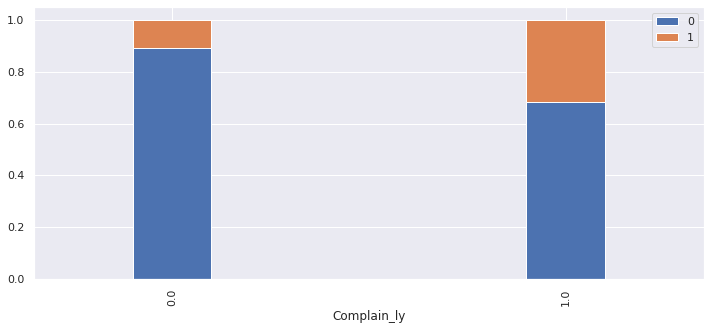

In [41]:
df= churn.groupby('Complain_ly')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(12,5), width=0.2)
plt.legend(loc="Upper Right")

### <font color="Green"><i>The customers with complaints registered have churned significantly more rather than the ones who have never registered any

####   <font color='Red'> <B> Churn vs rev_growth_yoy

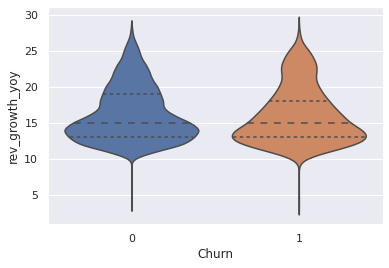

In [42]:
sns.violinplot(churn['Churn'],churn['rev_growth_yoy'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Green"><i>Percentage of Customers with yearly revenue growth above 23 seems to be churning more. 

####   <font color='Red'> <B> Churn vs coupon_used_for_payment

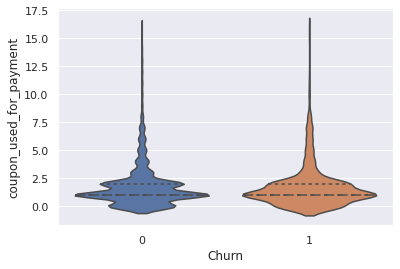

In [43]:
sns.violinplot(churn['Churn'],churn['coupon_used_for_payment'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Green"><i>Percentage of Customers using less no of coupons seems to be churning more.

####   <font color='Red'> <B> Churn vs Day_Since_CC_connect

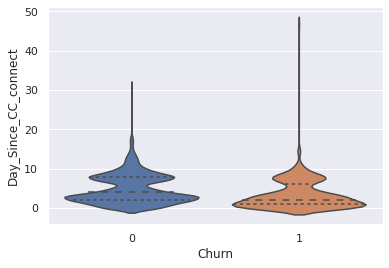

In [44]:
sns.violinplot(churn['Churn'],churn['Day_Since_CC_connect'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

### <font color="Green"><i>Customers who have not contacted with Customer care for longer period seems to be churning more compared to those with frequent connects.

####   <font color='Red'> <B> Churn vs cashback

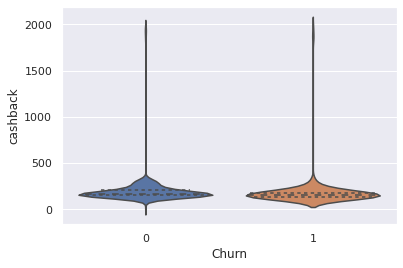

In [45]:
sns.violinplot(churn['Churn'],churn['cashback'],inner='quartile',scale='width',orient='vertical',scale_hue=True);

####   <font color='Red'> <B> Churn vs Login_device

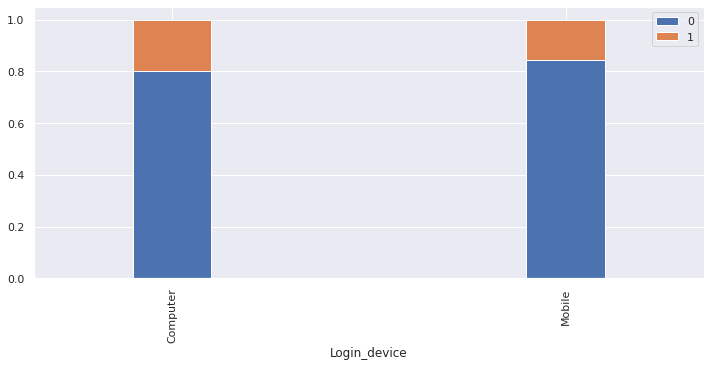

In [46]:
df= churn.groupby('Login_device')['Churn'].value_counts(normalize=True).unstack('Churn')
df.plot.bar(stacked=True,figsize=(12,5), width=0.2)
plt.legend(loc="Upper Right")

### <font color="Green"><i>The consumers having logged in via mobile have churned less as per the graph plotted above. Possibly, due to the company providing services for payment, offers, product, customer care assistance solutions in form of an app

### <font color="Green"><i>

####   <font color='Blue'> <B> Downloading above cleaned Dataframe for Clustering Purpose to classify customers into various segments

In [47]:
churn.to_csv('Churn For Clustering.csv', index = False)

In [48]:
files.download('Churn For Clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# Data Models in Python can take only numerical / categorical colums. It cannot take string / object types. 
# Converting object variables into numerical datatypes
for feature in churn.columns: 
    if churn[feature].dtype == 'object': 
        churn[feature] = pd.Categorical(churn[feature]).codes

In [50]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11260 non-null  int8   
 5   Gender                   11260 non-null  int8   
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11260 non-null  int8   
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11260 non-null  int8   
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

####   <font color='Blue'> <B>Proportion in the Target classes

In [51]:
churn.Churn.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

### <font color = "Red">  Split into Train-Test Data

In [52]:
X=churn.drop(['Churn'],axis=1)
Y=churn.Churn 

In [53]:
X.head()

Tenure  City_Tier  ...  cashback  Login_device
0     4.0        3.0  ...    159.93             1
1     0.0        1.0  ...    120.90             1
2     0.0        1.0  ...       NaN             1
3     0.0        3.0  ...    134.07             1
4     0.0        1.0  ...    129.60             1

[5 rows x 17 columns]

In [54]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.30)

## Checking the dimensions of the training and test data

In [56]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (7882, 17)
x_test (3378, 17)
y_train (7882,)
y_test (3378,)


In [57]:
x_train_treated=x_train.copy()
x_test_treated=x_test.copy()

### <font color = "Blue"><b>Missing Value treatment 

#### <font color = "Red"><b> KNN Imputation Method to impute missing values 

In [58]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)

In [59]:
cols=x_train_treated.columns

In [60]:
x_train_treated2=pd.DataFrame(np.round(imputer.fit_transform(x_train_treated),0),columns=cols)


In [61]:
x_train_treated2.head()

Tenure  City_Tier  ...  cashback  Login_device
0    11.0        1.0  ...     164.0          -1.0
1    22.0        3.0  ...     180.0           1.0
2    15.0        1.0  ...     284.0           0.0
3    15.0        1.0  ...     175.0           1.0
4     0.0        1.0  ...     150.0           1.0

[5 rows x 17 columns]

In [62]:
for feature in x_train_treated2.columns:
  print(feature)
  print(x_train_treated2[feature].unique())
  print('\n')

Tenure
[11. 22. 15.  0.  9.  5.  1. 10.  8. 20. 18. 31.  6. 23.  2. 26. 16. 19.
 13. 29. 24. 14. 99.  4. 12.  3. 25.  7. 17. 30. 28. 21. 27. 37. 51. 50.
 61. 38. 60. 42. 36.]


City_Tier
[1. 3. 2.]


CC_Contacted_LY
[ 22.  14.  24.  16.   9.  13.  26.  15.  10.  34.  11.  12.   8.  35.
  19.  17.  23.   6.  18.  29.  20.  32.   7.  21.  28.  40.  30.  36.
  33.  39.  38.  27.  25.  37.  42.  31.  41. 126.   5.  43. 132.]


Payment
[-1.  3.  2.  1.  0.  4.]


Gender
[ 1.  0. -1.]


Service_Score
[0. 4. 3. 1. 2. 5.]


Account_user_count
[4. 3. 5. 6. 2. 1.]


account_segment
[ 3.  1.  0.  2.  4. -1.]


CC_Agent_Score
[5. 1. 3. 4. 2.]


Marital_Status
[ 1.  2.  0. -1.]


rev_per_month
[  7.   6.   2.   8.   3.   5.   9.   1.  10.   4.  12.  11.  13.  25.
 136. 139. 115.  23.  15. 133.  14. 113. 125. 102. 123. 119. 134.  49.
  47. 129. 117. 126. 101. 110. 118. 105. 109. 116. 140. 131. 138. 127.
 114.  38.  40. 107. 124.  20. 137. 103. 104. 120.  45. 108. 130. 135.
 111. 100.  46.]


Complai

In [63]:
x_test_treated2=pd.DataFrame(np.round(imputer.transform(x_test_treated),0),columns=cols)

In [64]:
for feature in x_test_treated2.columns:
  print(feature)
  print(x_test_treated2[feature].unique())
  print('\n')

Tenure
[ 0. 10.  9.  2. 14.  7.  8. 11. 29. 28.  4. 21.  1. 19. 12. 24. 15. 26.
 18. 31. 16.  6.  5. 99.  3. 25. 13. 22. 17. 23. 20. 30. 27.]


City_Tier
[1. 3. 2.]


CC_Contacted_LY
[ 31.  22.  23.  10.  25.  21.  28.  13.  16.  29.   9.  20.  14.  12.
  17.  15.   8.  34.  11.   7.  24.  35.   6.  36.  33.  19.  32.  30.
  27.  26.  37.  18.  40.  38.  39.  42.  41.  43.   5.   4. 127. 129.]


Payment
[ 2.  3.  1.  4.  0. -1.]


Gender
[ 0.  1. -1.]


Service_Score
[2. 4. 3. 1. 5. 0.]


Account_user_count
[1. 3. 5. 2. 4. 6.]


account_segment
[ 2.  3.  0.  4. -1.  1.]


CC_Agent_Score
[2. 5. 4. 1. 3.]


Marital_Status
[ 2.  1.  0. -1.]


rev_per_month
[  2.   5.   6.   4.   3.   8.   9.  11.   7.   1.  10.  12.  15.  13.
 102. 123.  14. 121.  19. 138.  21. 114. 124.  22. 107.  37. 115. 108.
 137. 113.  46.  50. 117. 118.  39. 122.  48. 134. 130. 110.  42.]


Complain_ly
[1. 0.]


rev_growth_yoy
[12. 20. 14. 19. 16. 25. 15. 17. 22. 13. 18. 11. 21. 23. 24. 27. 26. 28.
  4.]


coupon_us

In [65]:
x_train_treated2.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [66]:
x_test_treated2.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

### <font color= "Blue"> <b> Outlier treatment (if required)

### <font color= "Red"><b> From the unvariate analysis performed below features are Categorical Data mostly of Ordinal Type, hence they do not require Outlier Treatment:
##### <font color= "Green">'Service_Score', 

### <font color= "Red"><b>But Below Features require outlier treatment
##### <font color= "Green">'Tenure',<br>'CC_Contacted_LY',<br>'Account_user_count', <br>'rev_per_month',<br>'rev_growth_yoy', <br>'Day_Since_CC_connect','cashback' <br>coupon_used_for_payment'

In [67]:
out_col=['Tenure','CC_Contacted_LY','Account_user_count','rev_per_month','Day_Since_CC_connect','cashback','coupon_used_for_payment']

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

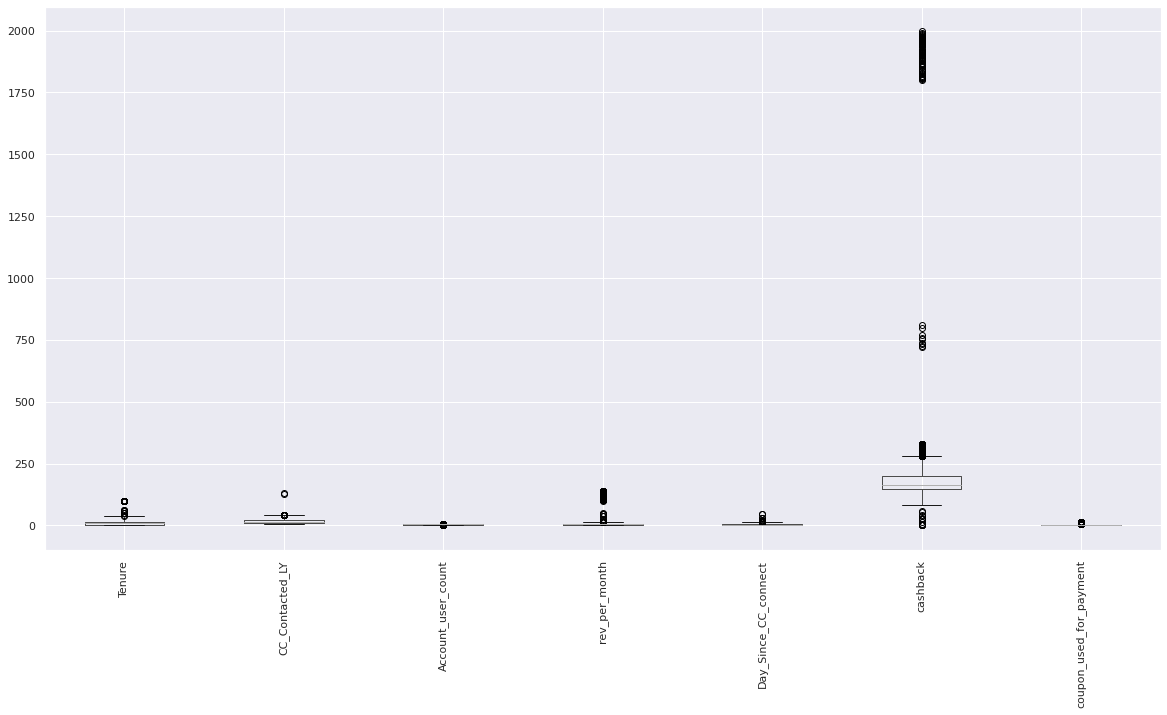

In [68]:
x_train_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

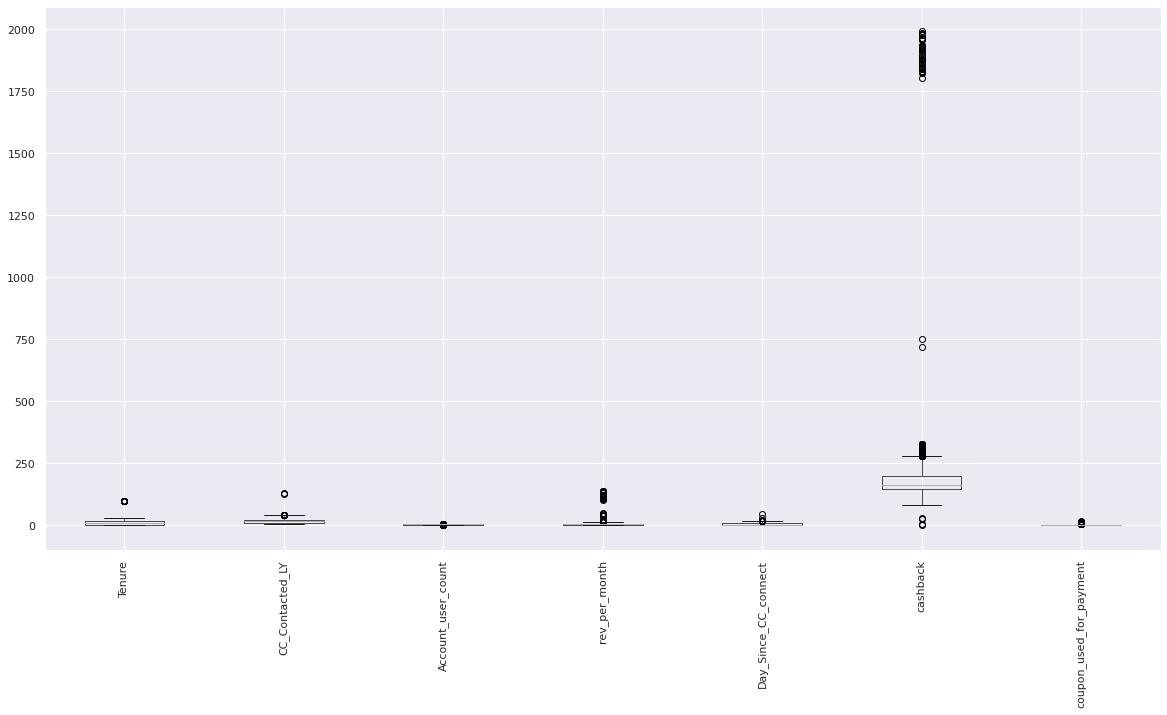

In [69]:
x_test_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

In [70]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.nanpercentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [71]:
for i in range(0,len(out_col)):
  lr,ur=remove_outlier(x_train_treated2[out_col[i]])
  x_train_treated2[out_col[i]]=np.where(x_train_treated2[out_col[i]]>ur,ur,x_train_treated2[out_col[i]])
  x_train_treated2[out_col[i]]=np.where(x_train_treated2[out_col[i]]<lr,lr,x_train_treated2[out_col[i]])
  x_test_treated2[out_col[i]]=np.where(x_test_treated2[out_col[i]]>ur,ur,x_test_treated2[out_col[i]])
  x_test_treated2[out_col[i]]=np.where(x_test_treated2[out_col[i]]<lr,lr,x_test_treated2[out_col[i]])

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

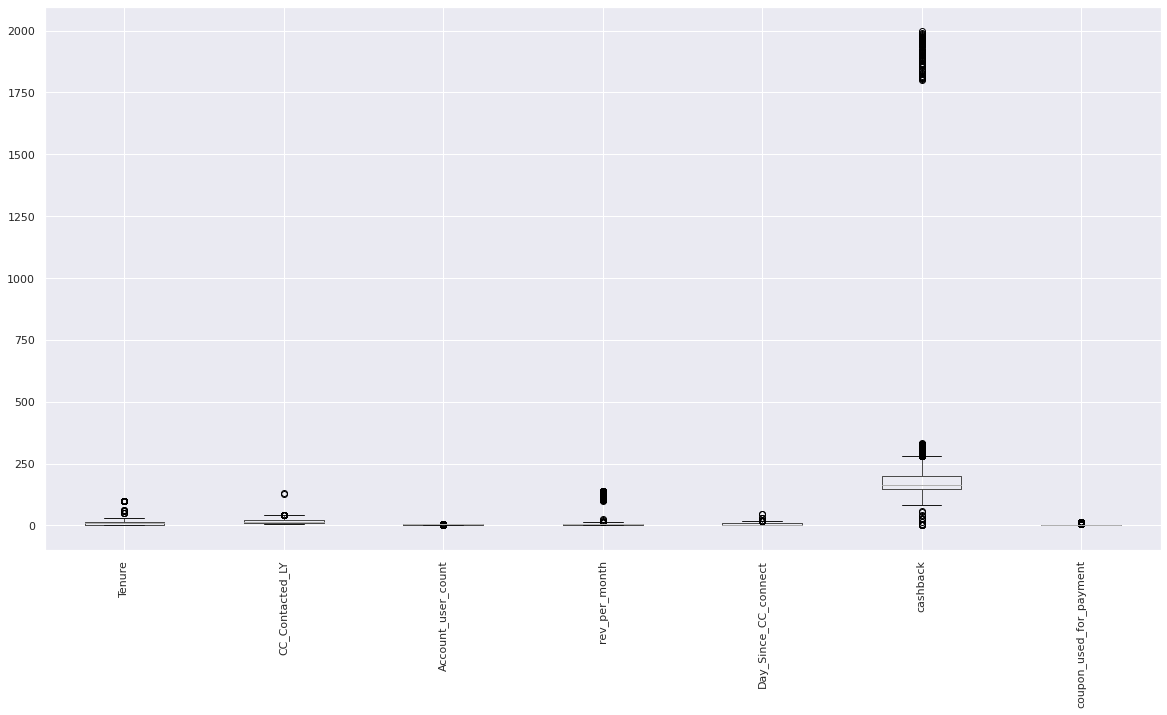

In [72]:
x_train[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

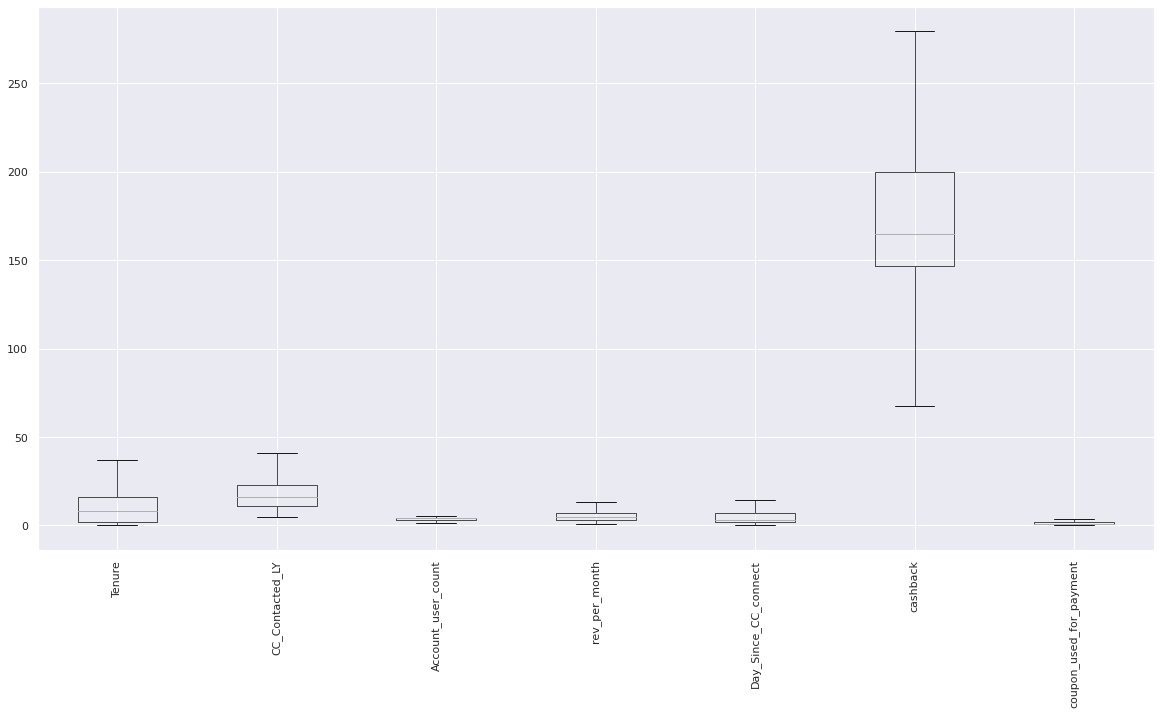

In [73]:
x_train_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

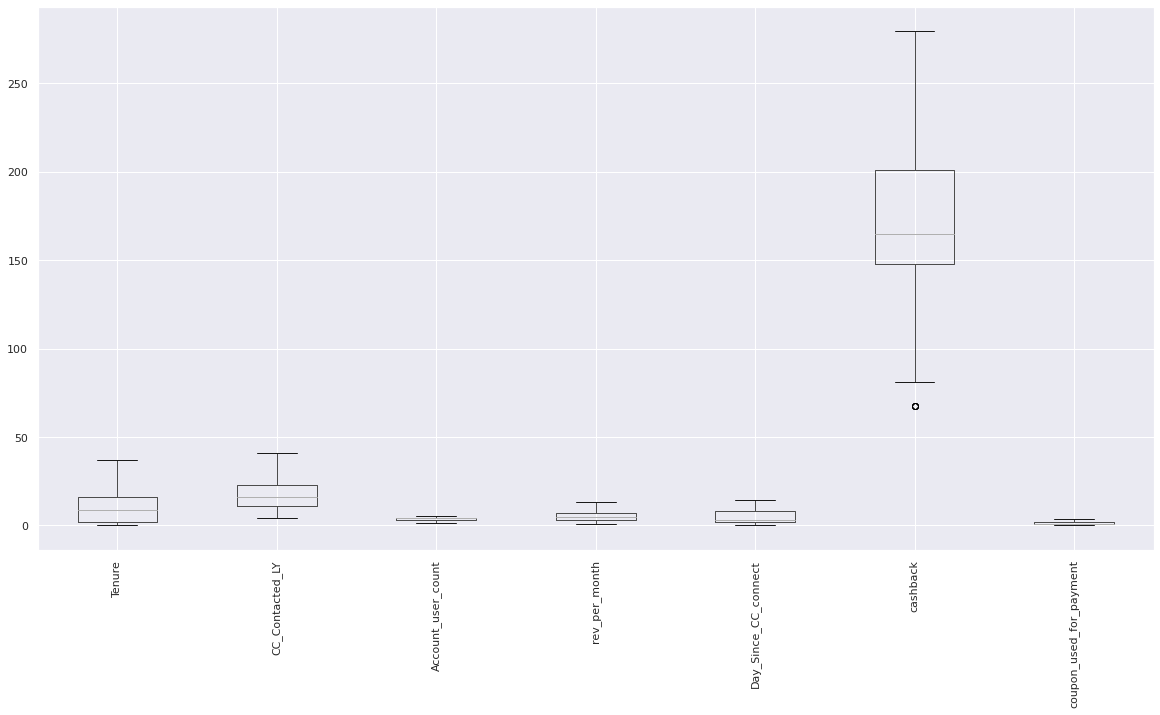

In [74]:
x_test_treated2[out_col].boxplot(figsize=(20,10))
plt.xticks(rotation=90)

### <font color = "Blue"> <b>3.e) Variable transformation (if applicable)

#### <font color = "Red"><b> Standard Scaling the data:

#### <font color = "Green"> **Since features are based on different unit scale (especially revenue features and cashback) , it will be ideal to perform scaling of the data for the preparation of Data Models in future.

#### <font color = "Green"> ** It can be noted here that the higher magnitude of some variables will affected the distance between the two points which will impact the performance of distance based model as it will give higher weightage to variables which have higher magnitude.
    
#### <font color = "Green"> ** We do not want our algorithm to be affected by the magnitude of these variables and be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale.

#### <font color = "Green"> ** Various scaling techniques like Normalization, Min-max, Standard Scaler Technique can be used to scale the data. 

#### <font color = "Sky Blue"> ** For this problem I chose to use Standard Scaler from Sklearn Library

In [75]:
sc = StandardScaler() 
x_train_scaled = sc.fit_transform(x_train_treated2) 
x_test_scaled = sc.transform (x_test_treated2)

# <font color = Purple> <font size= 25>  <center> <b> -----------------Project 2---------------------

## <font color = Blue> <b> 1. Model building and interpretation.
### <font color = Blue> <b> a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)<br>
### <font color = Blue> <b> b. Test your predictive model against the test set using various appropriate performance metrics 
### <font color = Blue> <b>c.Interpretation of the model(s)

## <font color = Green> <b> Building a Decision Tree Classifier

In [76]:
param_grid_cart = {
    'criterion': ['gini'],
    'max_depth': [40,50], 
    'min_samples_leaf': [5,10,15], 
    'min_samples_split': [15,20,40],
}
 
dtcl = DecisionTreeClassifier(random_state=0)
 
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_cart, cv = 10)

In [77]:
grid_search_dtcl.fit(x_train_treated2, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl


{'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 5, 'min_samples_split': 15}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Generating Tree

In [78]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized , feature_names = list(x_train_treated2), class_names = list(train_char_label))
 
tree_regularized.close()
files.download('tree_regularized.dot')
dot_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

http://webgraphviz.com/

## Variable Importance

In [79]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = x_train_treated2.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.358386
Day_Since_CC_connect     0.076044
Complain_ly              0.075760
CC_Agent_Score           0.072811
cashback                 0.063756
rev_per_month            0.053801
rev_growth_yoy           0.047238
CC_Contacted_LY          0.044788
Payment                  0.036806
City_Tier                0.035157
Marital_Status           0.033750
Account_user_count       0.025596
Login_device             0.023237
account_segment          0.020636
Gender                   0.016057
coupon_used_for_payment  0.009926
Service_Score            0.006251


### <font color = Red> <b> As per the cart model following features are not so important and hence can be dropped for model building 
### <font color = Green> <br>account_segment <br>Gender<br>coupon_used_for_payment <br>Service_Score   

## <font color="Green"> Predicting on Training and Test dataset using Cart model

In [80]:
# Predict both the train and test data
ytrain_predict_dtcl=best_grid_dtcl.predict(x_train_treated2)
ytest_predict_dtcl=best_grid_dtcl.predict(x_test_treated2)

### Getting the Predicted Classes and Probs

In [81]:
ytest_predict_dtcl_prob=best_grid_dtcl.predict_proba(x_test_treated2)
pd.DataFrame(ytest_predict_dtcl_prob).head()

0    1
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0

### Cart Model Evaluation

### AUC and ROC for the training data

AUC: 0.991


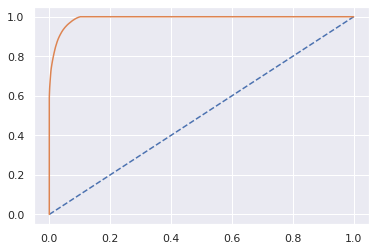

In [82]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.921


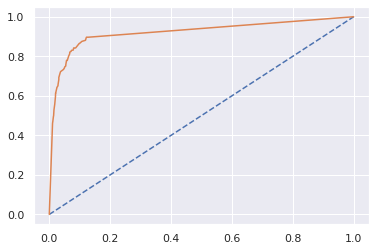

In [83]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [84]:
# create the confusion matrix
 
confusion_matrix(y_train,ytrain_predict_dtcl)

array([[6420,  136],
       [ 201, 1125]])

In [85]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train_treated2,y_train)
cart_train_acc

0.957244354224816

In [86]:
print(classification_report(y_train, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6556
           1       0.89      0.85      0.87      1326

    accuracy                           0.96      7882
   macro avg       0.93      0.91      0.92      7882
weighted avg       0.96      0.96      0.96      7882



In [87]:
cart_metrics=classification_report(y_train, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.89
cart_train_recall  0.85
cart_train_f1  0.87


### Confusion Matrix for test data

In [88]:
confusion_matrix(y_test, ytest_predict_dtcl)

array([[2703,  105],
       [ 158,  412]])

In [89]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test_treated2,y_test)
cart_test_acc

0.9221432800473653

In [90]:
print(classification_report(y_test, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2808
           1       0.80      0.72      0.76       570

    accuracy                           0.92      3378
   macro avg       0.87      0.84      0.86      3378
weighted avg       0.92      0.92      0.92      3378



In [91]:
cart_metrics=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.8
cart_test_recall  0.72
cart_test_f1  0.76


### <font color = Red> <b> Building a Decision Tree Classifier on datset without less important features

In [92]:
x_train_new=x_train_treated2.drop(['coupon_used_for_payment','account_segment','Gender','Service_Score'],axis=1)
x_test_new=x_test_treated2.drop(['coupon_used_for_payment','account_segment','Gender','Service_Score'],axis=1)

In [93]:
param_grid_cart = {
    'criterion': ['gini'],
    'max_depth': [50], 
    'min_samples_leaf': [2,3,5], 
    'min_samples_split': [10,15],
}
 
dtcl = DecisionTreeClassifier(random_state=0)
 
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_cart, cv = 10)

In [94]:
grid_search_dtcl.fit(x_train_new, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl


{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 10}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Generating Tree

In [95]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized , feature_names = list(x_train_new), class_names = list(train_char_label))
 
tree_regularized.close()
files.download('tree_regularized.dot')
dot_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

http://webgraphviz.com/

## Variable Importance

In [96]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = x_train_new.columns).sort_values('Imp',ascending=False))

                           Imp
Tenure                0.348641
Day_Since_CC_connect  0.086252
CC_Agent_Score        0.072963
Complain_ly           0.070806
cashback              0.067159
rev_growth_yoy        0.060681
rev_per_month         0.056264
CC_Contacted_LY       0.051171
Payment               0.041563
Marital_Status        0.039396
City_Tier             0.036938
Login_device          0.036331
Account_user_count    0.031834


## <font color="Green"> Predicting on Training and Test dataset using Cart model

In [97]:
# Predict both the train and test data
ytrain_predict_dtcl=best_grid_dtcl.predict(x_train_new)
ytest_predict_dtcl=best_grid_dtcl.predict(x_test_new)

### Getting the Predicted Classes and Probs

In [98]:
ytest_predict_dtcl_prob=best_grid_dtcl.predict_proba(x_test_new)
pd.DataFrame(ytest_predict_dtcl_prob).head()

0    1
0  0.5  0.5
1  0.0  1.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0

### Cart Model Evaluation

### AUC and ROC for the training data

AUC: 0.995


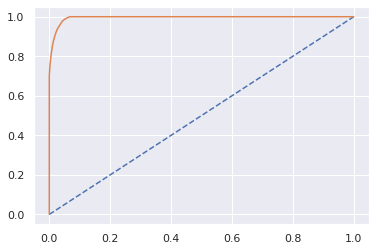

In [99]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_train_new)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.914


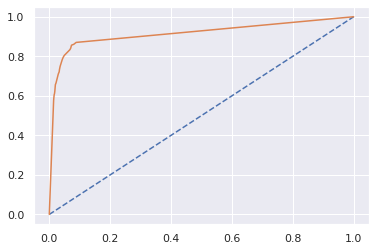

In [100]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_test_new)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [101]:
# create the confusion matrix
 
confusion_matrix(y_train,ytrain_predict_dtcl)

array([[6450,  106],
       [ 143, 1183]])

In [102]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train_new,y_train)
cart_train_acc

0.9684090332402944

In [103]:
print(classification_report(y_train, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6556
           1       0.92      0.89      0.90      1326

    accuracy                           0.97      7882
   macro avg       0.95      0.94      0.94      7882
weighted avg       0.97      0.97      0.97      7882



In [104]:
cart_metrics=classification_report(y_train, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.92
cart_train_recall  0.89
cart_train_f1  0.9


### Confusion Matrix for test data

In [105]:
confusion_matrix(y_test, ytest_predict_dtcl)

array([[2708,  100],
       [ 143,  427]])

In [106]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test_new,y_test)
cart_test_acc

0.9280639431616341

In [107]:
print(classification_report(y_test, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2808
           1       0.81      0.75      0.78       570

    accuracy                           0.93      3378
   macro avg       0.88      0.86      0.87      3378
weighted avg       0.93      0.93      0.93      3378



In [108]:
cart_metrics=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.81
cart_test_recall  0.75
cart_test_f1  0.78


# <font color = Green> <b> Building a Neural Network Classifier

In [109]:
param_grid_ann = {
    'hidden_layer_sizes': [(100,150,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.05,0.01],
    'max_iter' : [100,200,500]
}
 
nncl = MLPClassifier()
 
grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_ann, cv = 3)

In [110]:
grid_search_nncl.fit(x_train_scaled, y_train)
grid_search_nncl.best_params_


{'activation': 'relu',
 'hidden_layer_sizes': (100, 150, 100),
 'max_iter': 100,
 'solver': 'adam',
 'tol': 0.01}

In [111]:
best_grid_mlp = grid_search_nncl.best_estimator_
best_grid_mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)

## <font color="Green"> Predicting the Training and Testing data Using Artificial neural network

In [112]:
ytrain_predict_ann = best_grid_mlp.predict(x_train_scaled)
ytest_predict_ann = best_grid_mlp.predict(x_test_scaled)

### NN Model Performance Evaluation on Training data

In [113]:
 confusion_matrix(y_train,ytrain_predict_ann)

array([[6556,    0],
       [   2, 1324]])

In [114]:
nn_train_acc=best_grid_mlp.score(x_train_scaled,y_train) 
nn_train_acc

0.9997462572951028

In [115]:
 print(classification_report(y_train,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [116]:
nn_metrics=classification_report(y_train, ytrain_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  1.0
nn_train_recall  1.0
nn_train_f1  1.0


Area under Curve is 0.9992458521870287


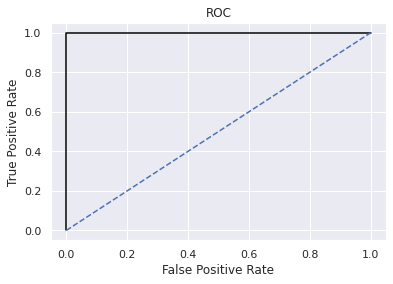

In [117]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid_mlp.predict_proba(x_train_scaled)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid_mlp.predict(x_train_scaled))
print('Area under Curve is', nn_train_auc)

### NN Model Performance Evaluation on Test data

In [118]:
confusion_matrix(y_test,ytest_predict_ann)

array([[2776,   32],
       [  98,  472]])

In [119]:
nn_test_acc=best_grid_mlp.score(x_test_scaled,y_test)
nn_test_acc

0.9615156897572528

In [120]:
print(classification_report(y_test,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2808
           1       0.94      0.83      0.88       570

    accuracy                           0.96      3378
   macro avg       0.95      0.91      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [121]:
nn_metrics=classification_report(y_test, ytest_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.94
nn_test_recall  0.83
nn_test_f1  0.88


Area under Curve is 0.9083370820212925


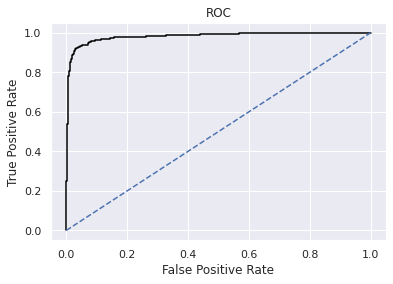

In [122]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid_mlp.predict_proba(x_test_scaled)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid_mlp.predict(x_test_scaled))
print('Area under Curve is', nn_test_auc)

In [123]:
best_grid_mlp.score

<bound method ClassifierMixin.score of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)>

# <font color = Green> <b>Building a Logistic Regression Model

## Applying GridSearchCV for Logistic Regression

In [124]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.001]}

In [125]:
model = LogisticRegression(max_iter=10000,n_jobs=-1,random_state=1,)

In [126]:
grid_search_lr = GridSearchCV(estimator = model, param_grid = grid, cv = 8,n_jobs=-1,scoring='f1')

In [127]:
grid_search_lr.fit(x_train_treated2, y_train)


GridSearchCV(cv=8, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [128]:
print(grid_search_lr.best_params_,'\n')
print(grid_search_lr.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='none',
                   random_state=1, solver='newton-cg', tol=0.001, verbose=0,
                   warm_start=False)


In [129]:
best_model_lr = grid_search_lr.best_estimator_

In [130]:
# Prediction on the training set

ytrain_predict_lr = best_model_lr.predict(x_train_treated2)
ytest_predict_lr = best_model_lr.predict(x_test_treated2)

In [131]:
## Getting the probabilities on the test set

ytest_predict_lr_prob=best_model_lr.predict_proba(x_test_treated2)
pd.DataFrame(ytest_predict_lr_prob).head()

0         1
0  0.546232  0.453768
1  0.443331  0.556669
2  0.910408  0.089592
3  0.731837  0.268163
4  0.983790  0.016210

#### <font color="red">*Checking Performance matrix for Logistic Regression Model*

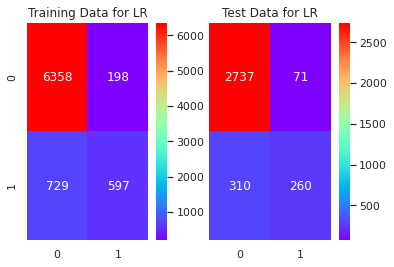

In [132]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_lr)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for LR')

#Plotting confusion matrix for the different models for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_lr)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for LR');

In [133]:
## Classification Report on the training data
print('Classification Report of the training data of Logisitic Regression Model:\n\n',classification_report(y_train, ytrain_predict_lr),'\n');

Classification Report of the training data of Logisitic Regression Model:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      6556
           1       0.75      0.45      0.56      1326

    accuracy                           0.88      7882
   macro avg       0.82      0.71      0.75      7882
weighted avg       0.87      0.88      0.87      7882
 



In [134]:
# Accuracy - Train Data
lr_train_acc=best_model_lr.score(x_train_treated2, y_train)
lr_train_acc

0.8823902562801319

In [135]:
lr_train_metrics=classification_report(y_train, ytrain_predict_lr,output_dict=True)
df=pd.DataFrame(lr_train_metrics).transpose()
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.75
lr_train_recall  0.45
lr_train_f1  0.56


In [136]:
## Classification Report on the test data
print('Classification Report of the test data of Logisitic Regression Model:\n\n',classification_report(y_test, ytest_predict_lr));

Classification Report of the test data of Logisitic Regression Model:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93      2808
           1       0.79      0.46      0.58       570

    accuracy                           0.89      3378
   macro avg       0.84      0.72      0.76      3378
weighted avg       0.88      0.89      0.87      3378



In [137]:
# Accuracy - Test Data
lr_test_acc=best_model_lr.score(x_test_treated2, y_test)
lr_test_acc

0.8872113676731794

In [138]:
lr_test_metrics=classification_report(y_test, ytest_predict_lr,output_dict=True)
df=pd.DataFrame(lr_test_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.79
lr_test_recall  0.46
lr_test_f1  0.58


#### <font color="red"> *AUC and ROC for the training data on Logistic Regression Model*

AUC for Linear Regression Train Data: 0.868


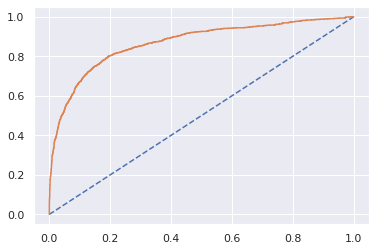

In [139]:
# predict probabilities
probs = best_model_lr.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC for Logistic Regression Train Data: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Logistic Regression Model*

AUC for Linear Regression Test Data: 0.869


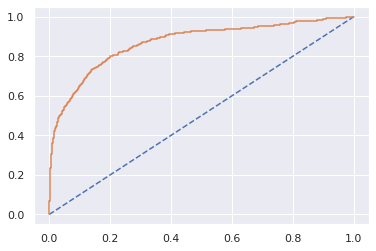

In [140]:
# predict probabilities
probs = best_model_lr.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC for Logistic Regression Test Data: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr);

#### <font color="red"> *Getting co-efficients and Intercepts of Logisitic regression Model*

In [141]:
model_lr = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1,penalty='l2', solver= 'saga', tol= 0.0001)

In [142]:
model_lr.fit(x_train_treated2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2', random_state=1,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [143]:
model_lr.coef_

array([[-0.17495257,  0.30702024,  0.01660171, -0.0762125 ,  0.04763329,
        -0.16438382,  0.25180392, -0.44038428,  0.21388424,  0.36592432,
         0.12566733,  1.52159553, -0.05211457,  0.19264881, -0.08609711,
        -0.00853054, -0.24046969]])

In [144]:
model_lr.intercept_

array([-0.57049095])

In [145]:
#Performance outcomes of Logistic Regression Model
model_param_lr_train=lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1
model_param_lr_test=lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1
print(model_param_lr_train)
print(model_param_lr_test)

(0.8823902562801319, 0.8677034243556155, 0.45, 0.75, 0.56)
(0.8872113676731794, 0.8691564202529116, 0.46, 0.79, 0.58)


# <font color = Green> <b>Building a KNN Model

In [146]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    # evaluate test accuracy
    scores = knn.score(x_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.03256364712847837,
 0.04262877442273538,
 0.04262877442273538,
 0.052101835405565455,
 0.047957371225577305,
 0.06631142687981051,
 0.05891059798697451,
 0.07785671995263466,
 0.07223208999407937,
 0.08969804618117228,
 0.08614564831261107,
 0.09769094138543521,
 0.09295441089402012,
 0.10183540556542336,
 0.09857904085257552,
 0.10746003552397865,
 0.10449970396684427,
 0.11338069863824751,
 0.10686796921255182]

#### <font color = "Blue"> *Plotting misclassification error vs k (with k value on X-axis)*

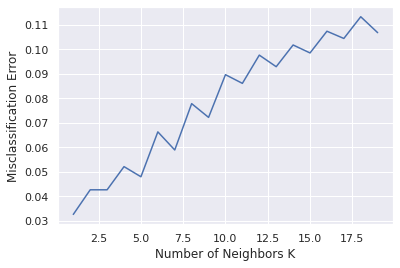

In [147]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### <font color = "Navy Blue"> *From the above graph the optimal value of k comes out to be 2

In [148]:
Model_knn=KNeighborsClassifier(n_neighbors=2)
Model_knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [149]:
ytrain_predict_knn = Model_knn.predict(x_train_scaled)
ytest_predict_knn = Model_knn.predict(x_test_scaled)

#### <font color="red">***Checking Performance matrix, AUC and ROC for KNN Model***

#### <font color="red">*Checking Performance matrix for KNN Model*

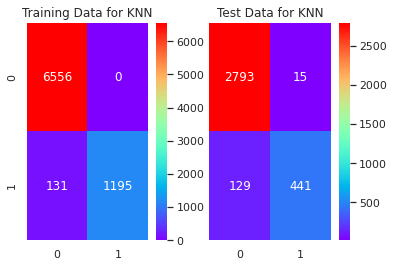

In [150]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the KNN model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_knn)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for KNN')

#Plotting confusion matrix for the KNN model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_knn)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for KNN');

In [151]:
## Classification Report on the train data
print('Classification Report of the train data of KNN Model:\n\n',classification_report(y_train, ytrain_predict_knn));

Classification Report of the train data of KNN Model:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6556
           1       1.00      0.90      0.95      1326

    accuracy                           0.98      7882
   macro avg       0.99      0.95      0.97      7882
weighted avg       0.98      0.98      0.98      7882



In [152]:
# Accuracy - Train Data
knn_train_acc=Model_knn.score(x_train_scaled, y_train)
knn_train_acc

0.9833798528292311

In [153]:
knn_train_metrics=classification_report(y_train, ytrain_predict_knn,output_dict=True)
df_knn=pd.DataFrame(knn_train_metrics).transpose()
knn_train_precision=round(df_knn.loc["1"][0],2)
knn_train_recall=round(df_knn.loc["1"][1],2)
knn_train_f1=round(df_knn.loc["1"][2],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  1.0
knn_train_recall  0.9
knn_train_f1  0.95


In [154]:
## Classification Report on the test data
print('Classification Report of the test data of KNN Model:\n\n',classification_report(y_test, ytest_predict_knn));


Classification Report of the test data of KNN Model:

               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2808
           1       0.97      0.77      0.86       570

    accuracy                           0.96      3378
   macro avg       0.96      0.88      0.92      3378
weighted avg       0.96      0.96      0.96      3378



In [155]:
# Accuracy - Test Data
knn_test_acc=Model_knn.score(x_test_scaled, y_test)
knn_test_acc

0.9573712255772646

In [156]:
knn_test_metrics=classification_report(y_test, ytest_predict_knn,output_dict=True)
df_knn_t=pd.DataFrame(knn_test_metrics).transpose()
knn_test_precision=round(df_knn_t.loc["1"][0],2)
knn_test_recall=round(df_knn_t.loc["1"][1],2)
knn_test_f1=round(df_knn_t.loc["1"][2],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.97
knn_test_recall  0.77
knn_test_f1  0.86


#### <font color="red"> *AUC and ROC for the training data on KNN Model*

AUC for KNN Train Data: 0.999


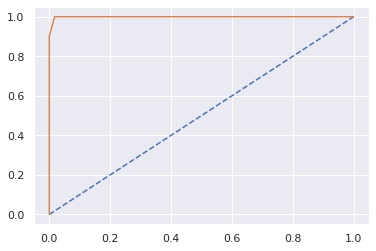

In [157]:
# predict probabilities
probs_knn_tr = Model_knn.predict_proba(x_train_scaled)
# keep probabilities for the positive outcome only
probs_knn_tr = probs_knn_tr[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs_knn_tr)
print('AUC for KNN Train Data: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs_knn_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);

#### <font color="red">*AUC and ROC for the test data on KNN Model*

AUC for KNN Test Data: 0.960


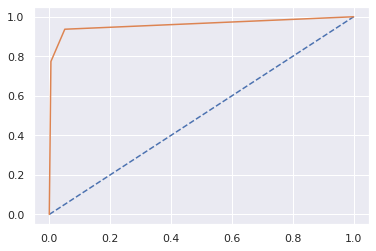

In [158]:
# predict probabilities
probs_knn_t = Model_knn.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
probs_knn_t = probs_knn_t[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs_knn_t)
print('AUC for KNN Test Data: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs_knn_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);

In [159]:
#Performance outcomes of KNN Model
model_param_knn_train=knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1
model_param_knn_test=knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1
print(model_param_knn_train)
print(model_param_knn_test)

(0.9833798528292311, 0.9991335237338002, 0.9, 1.0, 0.95)
(0.9573712255772646, 0.9601561328535013, 0.77, 0.97, 0.86)


## <font color = Blue> <b>2. Model Tuning
### <font color = Blue> <b>a.Ensemble modelling, wherever applicable 
### <font color = Blue> <b>b. Any other model tuning measures(if applicable)
### <font color = Blue> <b> c. Interpretation of the most optimum model and its implication on the business

## <font color = Green> <b> Enseamble Models: Building a Random Forest Classifier

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [160]:
from sklearn.model_selection import GridSearchCV
 
param_grid_rfcl = {
    'max_depth': [40],
    'max_features': [7,8],
    'min_samples_leaf': [4,5,6], 
    'min_samples_split': [12,15],
    'n_estimators': [150,160,170]
}
 
rfcl = RandomForestClassifier()
 
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [161]:
grid_search_rfcl.fit(x_train_treated2, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [162]:
grid_search_rfcl.best_params_

{'max_depth': 40,
 'max_features': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 150}

In [163]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [164]:
best_grid_rfcl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## <font color="Green"> Predicting the Training and Testing data using Random Forest Classifcation

In [165]:
ytrain_predict_rf = best_grid_rfcl.predict(x_train_treated2)
ytest_predict_rf = best_grid_rfcl.predict(x_test_treated2)

## RF Model Performance Evaluation on Training data

In [166]:
confusion_matrix(y_train,ytrain_predict_rf)

array([[6527,   29],
       [ 177, 1149]])

In [167]:
rf_train_acc=best_grid_rfcl.score(x_train_treated2,y_train) 
rf_train_acc

0.9738645013955849

In [168]:
print(classification_report(y_train,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6556
           1       0.98      0.87      0.92      1326

    accuracy                           0.97      7882
   macro avg       0.97      0.93      0.95      7882
weighted avg       0.97      0.97      0.97      7882



In [170]:
rf_metrics=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.98
rf_train_recall  0.87
rf_train_f1  0.92


Area under Curve is 0.9310462040919997


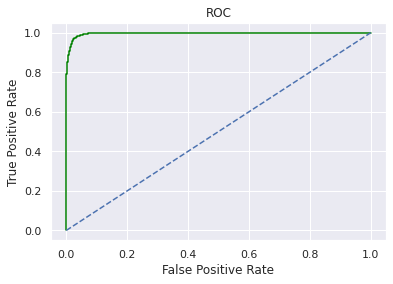

In [171]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid_rfcl.predict_proba(x_train_treated2)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid_rfcl.predict(x_train_treated2))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [172]:
confusion_matrix(y_test,ytest_predict_rf)

array([[2771,   37],
       [ 144,  426]])

In [173]:
rf_test_acc=best_grid_rfcl.score(x_test_treated2,y_test)
rf_test_acc

0.9464179988158674

In [174]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2808
           1       0.92      0.75      0.82       570

    accuracy                           0.95      3378
   macro avg       0.94      0.87      0.90      3378
weighted avg       0.95      0.95      0.94      3378



In [175]:
rf_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.iloc[1][0],2)
rf_test_recall=round(df.iloc[1][1],2)
rf_test_f1=round(df.iloc[1][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.92
rf_test_recall  0.75
rf_test_f1  0.82


Area under Curve is 0.8670958914379967


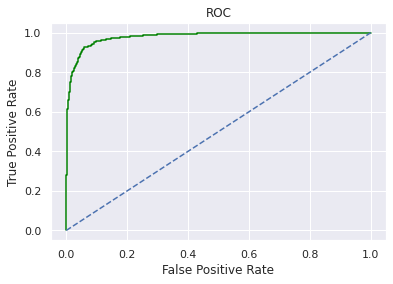

In [176]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(x_test_treated2)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict(x_test_treated2))
print('Area under Curve is', rf_test_auc)

In [177]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = x_train_treated2.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.344193
Complain_ly              0.083314
Day_Since_CC_connect     0.069849
cashback                 0.059649
CC_Agent_Score           0.056994
CC_Contacted_LY          0.054504
rev_per_month            0.053757
rev_growth_yoy           0.048181
Payment                  0.041549
Marital_Status           0.040298
account_segment          0.033574
City_Tier                0.027549
Account_user_count       0.026827
coupon_used_for_payment  0.018560
Login_device             0.016725
Gender                   0.014948
Service_Score            0.009530


### <font color = Red> <b> As per the random forest model following features are not so important and hence can be dropped for model building 
### <font color = Green> <br>Login_devices<br>Gender<br>coupon_used_for_payment <br>Service_Score 

# Building a Random Forest Classifier without unwanted features

In [178]:
x_train_new=x_train_treated2.drop(['coupon_used_for_payment','Login_device','Gender','Service_Score'],axis=1)
x_test_new=x_test_treated2.drop(['coupon_used_for_payment','Login_device','Gender','Service_Score'],axis=1)

In [179]:
x_train_new.shape

(7882, 13)

In [180]:
x_test_new.shape

(3378, 13)

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [181]:
from sklearn.model_selection import GridSearchCV
 
param_grid_rfcl = {
    'max_depth': [40],
    'max_features': [7,8],
    'min_samples_leaf': [2,3,4], 
    'min_samples_split': [8,10,12],
    'n_estimators': [135,140,150]
}
 
rfcl = RandomForestClassifier()
 
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [182]:
grid_search_rfcl.fit(x_train_new, y_train)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [183]:
grid_search_rfcl.best_params_

{'max_depth': 40,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 135}

In [184]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [185]:
best_grid_rfcl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=135,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## <font color="Green"> Predicting the Training and Testing data using Random Forest Classifcation

In [186]:
ytrain_predict_rf = best_grid_rfcl.predict(x_train_new)
ytest_predict_rf = best_grid_rfcl.predict(x_test_new)

## RF Model Performance Evaluation on Training data

In [187]:
confusion_matrix(y_train,ytrain_predict_rf)

array([[6542,   14],
       [  82, 1244]])

In [188]:
rf_train_acc=best_grid_rfcl.score(x_train_new,y_train) 
rf_train_acc

0.9878203501649327

In [189]:
print(classification_report(y_train,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6556
           1       0.99      0.94      0.96      1326

    accuracy                           0.99      7882
   macro avg       0.99      0.97      0.98      7882
weighted avg       0.99      0.99      0.99      7882



In [191]:
rf_metrics=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.99
rf_train_recall  0.94
rf_train_f1  0.96


Area under Curve is 0.9680122154460884


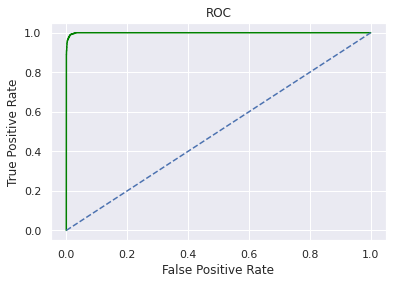

In [192]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid_rfcl.predict_proba(x_train_new)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid_rfcl.predict(x_train_new))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [193]:
confusion_matrix(y_test,ytest_predict_rf)

array([[2769,   39],
       [ 114,  456]])

In [194]:
rf_test_acc=best_grid_rfcl.score(x_test_new,y_test)
rf_test_acc

0.9547069271758437

In [195]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2808
           1       0.92      0.80      0.86       570

    accuracy                           0.95      3378
   macro avg       0.94      0.89      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [196]:
rf_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.iloc[1][0],2)
rf_test_recall=round(df.iloc[1][1],2)
rf_test_f1=round(df.iloc[1][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.92
rf_test_recall  0.8
rf_test_f1  0.86


Area under Curve is 0.8930555555555556


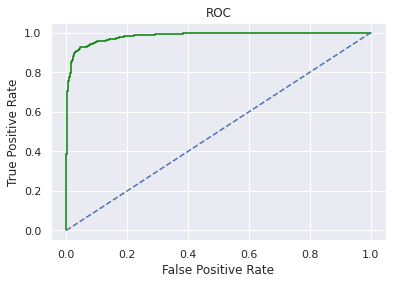

In [197]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(x_test_new)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict(x_test_new))
print('Area under Curve is', rf_test_auc)

In [198]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = x_train_new.columns).sort_values('Imp',ascending=False))

                           Imp
Tenure                0.332802
Day_Since_CC_connect  0.081721
Complain_ly           0.073057
cashback              0.069270
CC_Contacted_LY       0.067187
rev_growth_yoy        0.063014
rev_per_month         0.062845
CC_Agent_Score        0.060652
Payment               0.049820
Marital_Status        0.042233
account_segment       0.033911
Account_user_count    0.033437
City_Tier             0.030050


##   <font color='Blue'> Model Tuning, Bagging and Boosting.

## <font color = Green> <b> Enseamble Models: Building Ada Boost Model

In [199]:
Model_adb = AdaBoostClassifier(n_estimators=15,random_state=1,learning_rate=0.001)
Model_adb.fit(x_train_treated2,y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=15, random_state=1)

In [200]:
ytrain_predict_adb = Model_adb.predict(x_train_treated2)
ytest_predict_adb = Model_adb.predict(x_test_treated2)

#### <font color="red">***Checking Performance matrix, AUC and ROC for AdaBoosting Model***

#### <font color="red">*Checking Performance matrix for AdaBoosting Model*

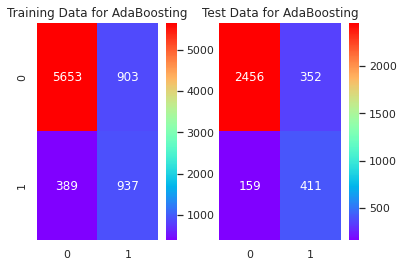

In [201]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the AdaBoosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_adb)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for AdaBoosting')

#Plotting confusion matrix for the AdaBoosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_adb)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for AdaBoosting');

In [202]:
## Classification Report on the train data
print('Classification Report of the train data of AdaBoosting Model:\n\n',classification_report(y_train, ytrain_predict_adb));

Classification Report of the train data of AdaBoosting Model:

               precision    recall  f1-score   support

           0       0.94      0.86      0.90      6556
           1       0.51      0.71      0.59      1326

    accuracy                           0.84      7882
   macro avg       0.72      0.78      0.74      7882
weighted avg       0.86      0.84      0.85      7882



In [203]:
# Accuracy - Train Data
adb_train_acc=Model_adb.score(x_train_treated2, y_train)
adb_train_acc

0.8360822126363867

In [204]:
adb_train_metrics=classification_report(y_train, ytrain_predict_adb,output_dict=True)
df_adb=pd.DataFrame(adb_train_metrics).transpose()
adb_train_precision=round(df_adb.loc["1"][0],2)
adb_train_recall=round(df_adb.loc["1"][1],2)
adb_train_f1=round(df_adb.loc["1"][2],2)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)

adb_train_precision  0.51
adb_train_recall  0.71
adb_train_f1  0.59


In [205]:
## Classification Report on the test data
print('Classification Report of the test data of AdaBoosting Model:\n\n',classification_report(y_test, ytest_predict_adb));


Classification Report of the test data of AdaBoosting Model:

               precision    recall  f1-score   support

           0       0.94      0.87      0.91      2808
           1       0.54      0.72      0.62       570

    accuracy                           0.85      3378
   macro avg       0.74      0.80      0.76      3378
weighted avg       0.87      0.85      0.86      3378



In [206]:
# Accuracy - Test Data
adb_test_acc=Model_adb.score(x_test_treated2, y_test)
adb_test_acc

0.8487270574304322

In [207]:
adb_test_metrics=classification_report(y_test, ytest_predict_adb,output_dict=True)
df_adb_t=pd.DataFrame(adb_test_metrics).transpose()
adb_test_precision=round(df_adb_t.loc["1"][0],2)
adb_test_recall=round(df_adb_t.loc["1"][1],2)
adb_test_f1=round(df_adb_t.loc["1"][2],2)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_test_precision  0.54
adb_test_recall  0.72
adb_test_f1  0.62


#### <font color="red"> *AUC and ROC for the training data on AdaBoosting Model*

AUC for AdaBoosting Train Data: 0.784


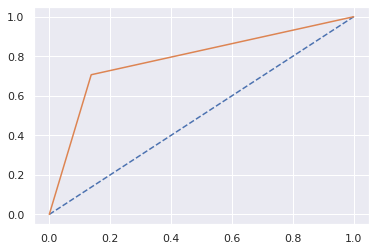

In [208]:
# predict probabilities
probs_adb_tr = Model_adb.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs_adb_tr = probs_adb_tr[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs_adb_tr)
print('AUC for AdaBoosting Train Data: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train, probs_adb_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr);

#### <font color="red">*AUC and ROC for the test data on AdaBoosting Model*





AUC for AdaBoosting Test Data: 0.798


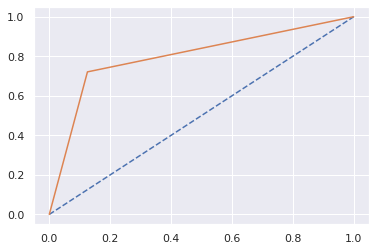

In [209]:
# predict probabilities
probs_adb_t = Model_adb.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_adb_t = probs_adb_t[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs_adb_t)
print('AUC for AdaBoosting Test Data: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_test_thresholds = roc_curve(y_test, probs_adb_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr);

In [210]:
model_param_adb_train=adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1
model_param_adb_test=adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1
print(model_param_adb_train)
print(model_param_adb_test)

(0.8360822126363867, 0.7844500380524858, 0.71, 0.51, 0.59)
(0.8487270574304322, 0.797848253111411, 0.72, 0.54, 0.62)


In [211]:
# Variable Importance
print (pd.DataFrame(Model_adb.feature_importances_, columns = ["Imp"], index = x_train_treated2.columns).sort_values('Imp',ascending=False))

                         Imp
Tenure                   1.0
Marital_Status           0.0
cashback                 0.0
Day_Since_CC_connect     0.0
coupon_used_for_payment  0.0
rev_growth_yoy           0.0
Complain_ly              0.0
rev_per_month            0.0
CC_Agent_Score           0.0
City_Tier                0.0
account_segment          0.0
Account_user_count       0.0
Service_Score            0.0
Gender                   0.0
Payment                  0.0
CC_Contacted_LY          0.0
Login_device             0.0


### <font color = Green> <i> AdaBoosting model seems to be considering only one features as important for Churn prediction and seems to be misjudging while considering importance of other independent features

## <font color = Green> <b> Enseamble Models: Building Gradient Boosting Model

In [212]:
from sklearn.ensemble import GradientBoostingClassifier
Model_gbcl = GradientBoostingClassifier(random_state=1,learning_rate=0.1, n_estimators=5000)
Model_gbcl = Model_gbcl.fit(x_train_treated2, y_train)

In [213]:
ytrain_predict_gbcl = Model_gbcl.predict(x_train_treated2)
ytest_predict_gbcl = Model_gbcl.predict(x_test_treated2)


#### <font color="red">***Checking Performance matrix, AUC and ROC for Gradient Boosting Model***

#### <font color="red">*Checking Performance matrix for Gradient Boosting Model*

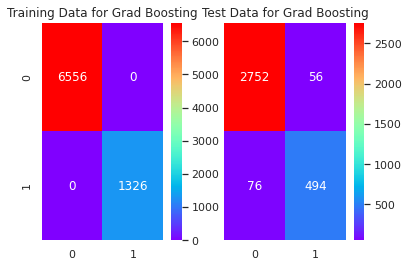

In [214]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Gradient Boosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Grad Boosting')

#Plotting confusion matrix for the Gradient Boosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Grad Boosting');

In [215]:
## Classification Report on the train data
print('Classification Report of the train data of Gradient Boosting Model:\n\n',classification_report(y_train, ytrain_predict_gbcl));

Classification Report of the train data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [216]:
# Accuracy - Train Data
gbcl_train_acc=Model_gbcl.score(x_train_treated2, y_train)
gbcl_train_acc

1.0

In [217]:
gbcl_train_metrics=classification_report(y_train, ytrain_predict_gbcl,output_dict=True)
df_gbcl=pd.DataFrame(gbcl_train_metrics).transpose()
gbcl_train_precision=round(df_gbcl.loc["1"][0],2)
gbcl_train_recall=round(df_gbcl.loc["1"][1],2)
gbcl_train_f1=round(df_gbcl.loc["1"][2],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  1.0
gbcl_train_recall  1.0
gbcl_train_f1  1.0


In [218]:
## Classification Report on the test data
print('Classification Report of the test data of Gradient Boosting Model:\n\n',classification_report(y_test, ytest_predict_gbcl));


Classification Report of the test data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2808
           1       0.90      0.87      0.88       570

    accuracy                           0.96      3378
   macro avg       0.94      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [219]:
# Accuracy - Test Data
gbcl_test_acc=Model_gbcl.score(x_test_treated2, y_test)
gbcl_test_acc

0.9609236234458259

In [220]:
gbcl_test_metrics=classification_report(y_test, ytest_predict_gbcl,output_dict=True)
df_gbcl_t=pd.DataFrame(gbcl_test_metrics).transpose()
gbcl_test_precision=round(df_gbcl_t.loc["1"][0],2)
gbcl_test_recall=round(df_gbcl_t.loc["1"][1],2)
gbcl_test_f1=round(df_gbcl_t.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.9
gbcl_test_recall  0.87
gbcl_test_f1  0.88


#### <font color="red"> *AUC and ROC for the training data on Gradient Boosting Model*

AUC for Gradient Train Data: 1.000


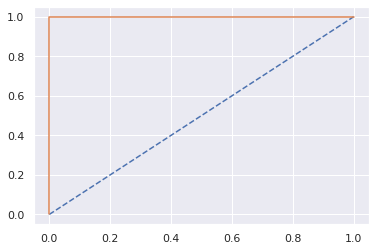

In [221]:
# predict probabilities
probs_gbcl_tr = Model_gbcl.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs_gbcl_tr = probs_gbcl_tr[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train, probs_gbcl_tr)
print('AUC for Gradient Train Data: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train, probs_gbcl_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Gradient Boosting Model*





AUC for Gradient Test Data: 0.988


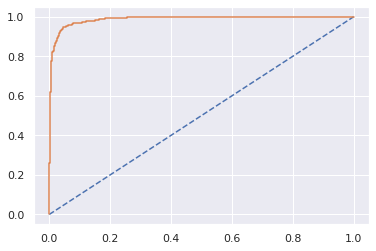

In [222]:
# predict probabilities
probs_gbcl_t = Model_gbcl.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_gbcl_t = probs_gbcl_t[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs_gbcl_t)
print('AUC for Gradient Test Data: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test, probs_gbcl_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr);

In [223]:
model_param_gbcl_train=gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1
model_param_gbcl_test=gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1
print(model_param_gbcl_train)
print(model_param_gbcl_test)

(1.0, 0.9999999999999999, 1.0, 1.0, 1.0)
(0.9609236234458259, 0.9877667816264306, 0.87, 0.9, 0.88)


In [224]:
# Variable Importance
print (pd.DataFrame(Model_gbcl.feature_importances_, columns = ["Imp"], index = x_train_treated2.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.434508
Complain_ly              0.101191
Day_Since_CC_connect     0.063264
rev_per_month            0.055385
CC_Agent_Score           0.049371
cashback                 0.045625
Payment                  0.037376
CC_Contacted_LY          0.034400
Marital_Status           0.033376
rev_growth_yoy           0.030310
account_segment          0.030119
City_Tier                0.022449
Account_user_count       0.021701
coupon_used_for_payment  0.015059
Service_Score            0.010495
Gender                   0.008877
Login_device             0.006493


### <font color = Red> <b> As per the Gradient Boosting model following features are not so important and hence can be dropped for model building 
### <font color = Green> <br>Login_devices<br>Gender<br>coupon_used_for_payment <br>Service_Score 

## <font color = Green> <b> Enseamble Models: Building a Bagging Model

In [227]:
RF_model=RandomForestClassifier(min_samples_leaf=20,min_samples_split=60)
Model_bagg=BaggingClassifier(base_estimator=RF_model,n_estimators=50,random_state=1)


In [228]:
Model_bagg.fit(x_train_treated2, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=20,
                                                        min_samples_split=60,
                                                        min_weight_fraction_leaf=0.0,
   

In [229]:
ytrain_predict_bagg = Model_bagg.predict(x_train_treated2)
ytest_predict_bagg = Model_bagg.predict(x_test_treated2)

#### <font color="red">***Checking Performance matrix, AUC and ROC for Bagging Model***

#### <font color="red">*Checking Performance matrix for Bagging Model*

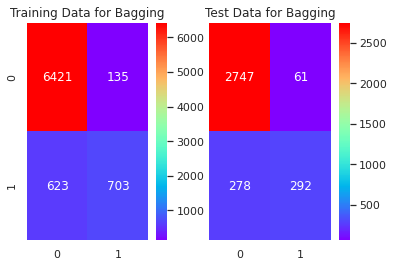

In [230]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Bagging model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict_bagg)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Bagging')

#Plotting confusion matrix for the Bagging model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_bagg)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Bagging');

In [231]:
## Classification Report on the train data
print('Classification Report of the train data of Bagging Model:\n\n',classification_report(y_train, ytrain_predict_bagg));

Classification Report of the train data of Bagging Model:

               precision    recall  f1-score   support

           0       0.91      0.98      0.94      6556
           1       0.84      0.53      0.65      1326

    accuracy                           0.90      7882
   macro avg       0.88      0.75      0.80      7882
weighted avg       0.90      0.90      0.89      7882



In [232]:
# Accuracy - Train Data
bagg_train_acc=Model_bagg.score(x_train_treated2, y_train)
bagg_train_acc

0.9038315148439482

In [233]:
bagg_train_metrics=classification_report(y_train, ytrain_predict_bagg,output_dict=True)
df_bagg=pd.DataFrame(bagg_train_metrics).transpose()
bagg_train_precision=round(df_bagg.loc["1"][0],2)
bagg_train_recall=round(df_bagg.loc["1"][1],2)
bagg_train_f1=round(df_bagg.loc["1"][2],2)
print ('bagg_train_precision ',bagg_train_precision)
print ('bagg_train_recall ',bagg_train_recall)
print ('bagg_train_f1 ',bagg_train_f1)

bagg_train_precision  0.84
bagg_train_recall  0.53
bagg_train_f1  0.65


In [234]:
## Classification Report on the test data
print('Classification Report of the test data of Bagging Model:\n\n',classification_report(y_test, ytest_predict_bagg));


Classification Report of the test data of Bagging Model:

               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2808
           1       0.83      0.51      0.63       570

    accuracy                           0.90      3378
   macro avg       0.87      0.75      0.79      3378
weighted avg       0.89      0.90      0.89      3378



In [235]:
# Accuracy - Test Data
bagg_test_acc=Model_bagg.score(x_test_treated2, y_test)
bagg_test_acc

0.8996447602131439

In [236]:
bagg_test_metrics=classification_report(y_test, ytest_predict_bagg,output_dict=True)
df_bagg_t=pd.DataFrame(bagg_test_metrics).transpose()
bagg_test_precision=round(df_bagg_t.loc["1"][0],2)
bagg_test_recall=round(df_bagg_t.loc["1"][1],2)
bagg_test_f1=round(df_bagg_t.loc["1"][2],2)
print ('bagg_test_precision ',bagg_test_precision)
print ('bagg_test_recall ',bagg_test_recall)
print ('bagg_test_f1 ',bagg_test_f1)

bagg_test_precision  0.83
bagg_test_recall  0.51
bagg_test_f1  0.63


#### <font color="red"> *AUC and ROC for the training data on Bagging Model*

AUC for Bagging Train Data: 0.946


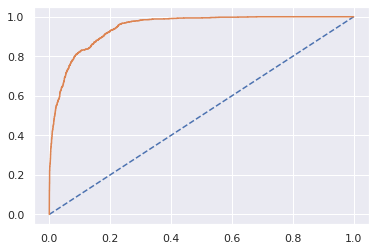

In [237]:
# predict probabilities
probs_bagg_tr = Model_bagg.predict_proba(x_train_treated2)
# keep probabilities for the positive outcome only
probs_bagg_tr = probs_bagg_tr[:, 1]
# calculate AUC
bagg_train_auc = roc_auc_score(y_train, probs_bagg_tr)
print('AUC for Bagging Train Data: %.3f' % bagg_train_auc)
# calculate roc curve
bagg_train_fpr, bagg_train_tpr, bagg_train_thresholds = roc_curve(y_train, probs_bagg_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagg_train_fpr, bagg_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Bagging Model*





AUC for Bagging Test Data: 0.932


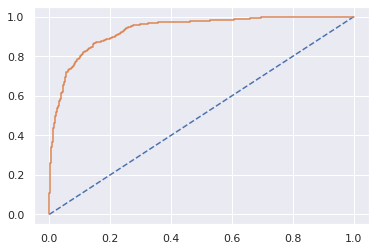

In [238]:
# predict probabilities
probs_bagg_t = Model_bagg.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_bagg_t = probs_bagg_t[:, 1]
# calculate AUC
bagg_test_auc = roc_auc_score(y_test, probs_bagg_t)
print('AUC for Bagging Test Data: %.3f' % bagg_test_auc)
# calculate roc curve
bagg_test_fpr, bagg_test_tpr, bagg_test_thresholds = roc_curve(y_test, probs_bagg_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagg_test_fpr, bagg_test_tpr);

In [239]:
model_param_bagg_train=bagg_train_acc,bagg_train_auc,bagg_train_recall,bagg_train_precision,bagg_train_f1
model_param_bagg_test=bagg_test_acc,bagg_test_auc,bagg_test_recall,bagg_test_precision,bagg_test_f1
print(model_param_bagg_train)
print(model_param_bagg_test)

(0.9038315148439482, 0.9456961810396473, 0.53, 0.84, 0.65)
(0.8996447602131439, 0.9319375718498525, 0.51, 0.83, 0.63)


# Inference: Basis on these predictions, what are the business insights and recommendations

# <font color="red"> <b> Model Performance of general methods

In [240]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1],
        'Log_Reg Train':model_param_lr_train,
        'Log_Reg Test':model_param_lr_test,
        'KNN Train':model_param_knn_train,
        'KNN Test':model_param_knn_test},index=index)
round(data,2)

CART Train  CART Test  ...  KNN Train  KNN Test
Accuracy         0.97       0.93  ...       0.98      0.96
AUC              1.00       0.91  ...       1.00      0.96
Recall           0.89       0.75  ...       0.90      0.77
Precision        0.92       0.81  ...       1.00      0.97
F1 Score         0.90       0.78  ...       0.95      0.86

[5 rows x 8 columns]

# <font color="red"> <b> Model Performance of Enseamble methods

In [241]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Bagging Train':model_param_bagg_train,
        'Bagging Test':model_param_bagg_test,
        'AdaBoosting Train':model_param_adb_train,
        'AdaBoosting Test':model_param_adb_test,
        'Gradient Boosting Train':model_param_gbcl_train,
        'Gradient Boosting Test':model_param_gbcl_test},index=index)
round(data,2)

Random Forest Train  ...  Gradient Boosting Test
Accuracy                  0.99  ...                    0.96
AUC                       0.97  ...                    0.99
Recall                    0.94  ...                    0.87
Precision                 0.99  ...                    0.90
F1 Score                  0.96  ...                    0.88

[5 rows x 8 columns]

# <font color ='red'> <b> Building Models on Smote data 

In [242]:
# SMOTE is only applied on the train data set
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=1)


In [243]:
x_train_res, y_train_res = sm.fit_sample(x_train_treated2, y_train.ravel())


In [244]:
x_train_bal=pd.DataFrame(x_train_res,columns=cols)
y_train_bal=pd.DataFrame(y_train_res)

In [245]:
## Let's check the shape after SMOTE
x_train_bal.shape

(13112, 17)

# <font color = Green> <b>Building a Decision Tree Classifier

In [246]:
param_grid_cart = {
    'criterion': ['gini'],
    'max_depth': [30,40], 
    'min_samples_leaf': [4,5,6], 
    'min_samples_split': [10,12,15],
}
 
dtcl = DecisionTreeClassifier(random_state=0)
 
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_cart, cv = 10)

In [247]:
grid_search_dtcl.fit(x_train_bal, y_train_bal)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 30, 'min_samples_split': 100}
# 1       0.97      0.97      0.97      6556 94
# 1       0.78      0.79      0.78       570 93

{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 10}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Generating Tree

In [248]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized , feature_names = list(x_train_bal), class_names = list(train_char_label))
 
tree_regularized.close()
files.download('tree_regularized.dot')
dot_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

http://webgraphviz.com/

## Variable Importance

In [249]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = x_train_bal.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.415090
Complain_ly              0.153384
CC_Agent_Score           0.052455
Marital_Status           0.050171
Day_Since_CC_connect     0.048832
Payment                  0.039107
account_segment          0.034149
rev_per_month            0.032924
cashback                 0.028783
City_Tier                0.027339
CC_Contacted_LY          0.027085
rev_growth_yoy           0.025272
Account_user_count       0.016483
Login_device             0.016436
Gender                   0.012129
coupon_used_for_payment  0.011247
Service_Score            0.009114


## <font color="Green"> Predicting on Training and Test dataset using Cart model

In [250]:
# Predict both the train and test data
ytrain_predict_dtcl=best_grid_dtcl.predict(x_train_bal)
ytest_predict_dtcl=best_grid_dtcl.predict(x_test_treated2)

### Getting the Predicted Classes and Probs

In [251]:
ytest_predict_dtcl_prob=best_grid_dtcl.predict_proba(x_test_treated2)
pd.DataFrame(ytest_predict_dtcl_prob).head()

0      1
0  0.800  0.200
1  0.125  0.875
2  1.000  0.000
3  1.000  0.000
4  1.000  0.000

### Cart Model Evaluation

### AUC and ROC for the training data

AUC: 0.999


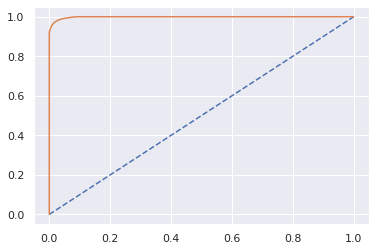

In [252]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train_bal, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train_bal, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.928


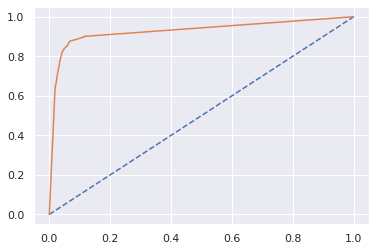

In [253]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

### Confusion Matrix for the training data

In [254]:
# create the confusion matrix
 
confusion_matrix(y_train_bal,ytrain_predict_dtcl)

array([[6430,  126],
       [ 170, 6386]])

In [255]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train_bal,y_train_bal)
cart_train_acc

0.9774252593044539

In [256]:
print(classification_report(y_train_bal, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6556
           1       0.98      0.97      0.98      6556

    accuracy                           0.98     13112
   macro avg       0.98      0.98      0.98     13112
weighted avg       0.98      0.98      0.98     13112



In [257]:
cart_metrics=classification_report(y_train_bal, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.98
cart_train_recall  0.97
cart_train_f1  0.98


### Confusion Matrix for test data

In [258]:
confusion_matrix(y_test, ytest_predict_dtcl)

array([[2690,  118],
       [ 102,  468]])

In [259]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test_treated2,y_test)
cart_test_acc

0.9348727057430433

In [260]:
print(classification_report(y_test, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2808
           1       0.80      0.82      0.81       570

    accuracy                           0.93      3378
   macro avg       0.88      0.89      0.89      3378
weighted avg       0.94      0.93      0.94      3378



In [261]:
cart_metrics=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.8
cart_test_recall  0.82
cart_test_f1  0.81


# <font color = Green> <i>Building a Decision Tree Classifier on datset without less important features

In [262]:
x_train_new2=x_train_bal.drop(['coupon_used_for_payment','account_segment','Gender','Service_Score'],axis=1)
x_test_new=x_test_treated2.drop(['coupon_used_for_payment','account_segment','Gender','Service_Score'],axis=1)

In [263]:
param_grid_cart = {
    'criterion': ['gini'],
    'max_depth': [50], 
    'min_samples_leaf': [2,3,5], 
    'min_samples_split': [10,15],
}
 
dtcl = DecisionTreeClassifier(random_state=0)
 
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_cart, cv = 10)

In [264]:
grid_search_dtcl.fit(x_train_new2, y_train_bal)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl


{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Generating Tree

In [265]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized , feature_names = list(x_train_new2), class_names = list(train_char_label))
 
tree_regularized.close()
files.download('tree_regularized.dot')
dot_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

http://webgraphviz.com/

## Variable Importance

In [266]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = x_train_new2.columns).sort_values('Imp',ascending=False))

                           Imp
Tenure                0.413887
Complain_ly           0.150834
CC_Agent_Score        0.059295
Marital_Status        0.058043
Day_Since_CC_connect  0.056634
cashback              0.043544
Payment               0.040044
CC_Contacted_LY       0.038123
rev_per_month         0.033946
City_Tier             0.032639
rev_growth_yoy        0.031236
Account_user_count    0.023944
Login_device          0.017830


## <font color="Green"> Predicting on Training and Test dataset using Cart model

In [267]:
# Predict both the train and test data
ytrain_predict_dtcl=best_grid_dtcl.predict(x_train_new2)
ytest_predict_dtcl=best_grid_dtcl.predict(x_test_new)

### Getting the Predicted Classes and Probs

In [268]:
ytest_predict_dtcl_prob=best_grid_dtcl.predict_proba(x_test_new)
pd.DataFrame(ytest_predict_dtcl_prob).head()

0         1
0  1.000000  0.000000
1  0.666667  0.333333
2  1.000000  0.000000
3  1.000000  0.000000
4  1.000000  0.000000

### Cart Model Evaluation

### AUC and ROC for the training data

AUC: 0.999


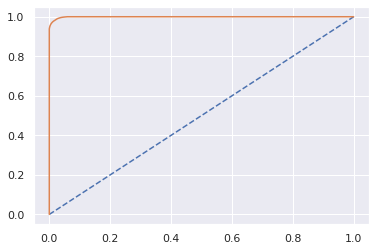

In [269]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_train_new2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train_bal, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train_bal, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr);

### AUC and ROC for the test data

AUC: 0.909


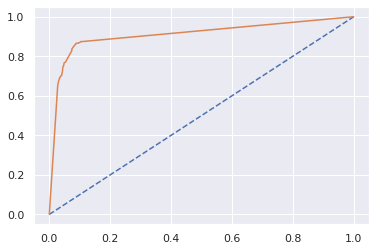

In [270]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(x_test_new)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr);

### Confusion Matrix for the training data

In [271]:
# create the confusion matrix
 
confusion_matrix(y_train_bal,ytrain_predict_dtcl)

array([[6464,   92],
       [ 146, 6410]])

In [272]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(x_train_new2,y_train_bal)
cart_train_acc

0.9818486882245272

In [273]:
print(classification_report(y_train_bal, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6556
           1       0.99      0.98      0.98      6556

    accuracy                           0.98     13112
   macro avg       0.98      0.98      0.98     13112
weighted avg       0.98      0.98      0.98     13112



In [274]:
cart_metrics=classification_report(y_train_bal, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.99
cart_train_recall  0.98
cart_train_f1  0.98


### Confusion Matrix for test data

In [275]:
confusion_matrix(y_test, ytest_predict_dtcl)

array([[2659,  149],
       [ 131,  439]])

In [276]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(x_test_new,y_test)
cart_test_acc

0.9171107164002368

In [277]:
print(classification_report(y_test, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2808
           1       0.75      0.77      0.76       570

    accuracy                           0.92      3378
   macro avg       0.85      0.86      0.85      3378
weighted avg       0.92      0.92      0.92      3378



In [278]:
cart_metrics=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.75
cart_test_recall  0.77
cart_test_f1  0.76


# <font color = Green> <b>Building a Neural Network Classifier

In [279]:
x_train_scaled2 = sc.fit_transform(x_train_bal) 
x_test_scaled2=sc.fit(x_test_treated2) 

In [280]:
param_grid_ann = {
    'hidden_layer_sizes': [(150,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01],
    'max_iter' : [100,200,500]
}
 
nncl = MLPClassifier()
 
grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_ann, cv = 3)

In [281]:
grid_search_nncl.fit(x_train_scaled2, y_train_bal)
grid_search_nncl.best_params_


{'activation': 'relu',
 'hidden_layer_sizes': (150, 100, 100),
 'max_iter': 200,
 'solver': 'adam',
 'tol': 0.01}

In [282]:
best_grid_mlp = grid_search_nncl.best_estimator_
best_grid_mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)

## <font color="Green"> Predicting the Training and Testing data Using Artificial neural network

In [283]:
ytrain_predict_ann = best_grid_mlp.predict(x_train_scaled2)
ytest_predict_ann = best_grid_mlp.predict(x_test_scaled)

### NN Model Performance Evaluation on Training data

In [284]:
 confusion_matrix(y_train_bal,ytrain_predict_ann)

array([[6555,    1],
       [   0, 6556]])

In [285]:
nn_train_acc=best_grid_mlp.score(x_train_scaled2,y_train_bal) 
nn_train_acc

0.9999237339841367

In [286]:
 print(classification_report(y_train_bal,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



In [287]:
nn_metrics=classification_report(y_train_bal, ytrain_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  1.0
nn_train_recall  1.0
nn_train_f1  1.0


Area under Curve is 0.9999237339841366


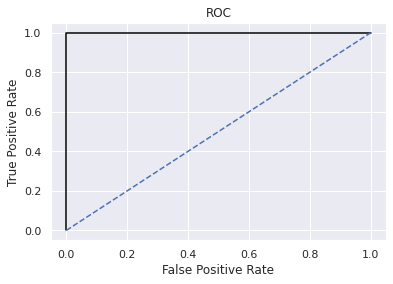

In [288]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train_bal,best_grid_mlp.predict_proba(x_train_scaled2)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train_bal,best_grid_mlp.predict(x_train_scaled2))
print('Area under Curve is', nn_train_auc)

### NN Model Performance Evaluation on Test data

In [289]:
confusion_matrix(y_test,ytest_predict_ann)

array([[2375,  433],
       [  26,  544]])

In [290]:
nn_test_acc=best_grid_mlp.score(x_test_scaled,y_test)
nn_test_acc

0.8641207815275311

In [291]:
print(classification_report(y_test,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      2808
           1       0.56      0.95      0.70       570

    accuracy                           0.86      3378
   macro avg       0.77      0.90      0.81      3378
weighted avg       0.92      0.86      0.88      3378



In [292]:
nn_metrics=classification_report(y_test, ytest_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.56
nn_test_recall  0.95
nn_test_f1  0.7


Area under Curve is 0.9000918428550007


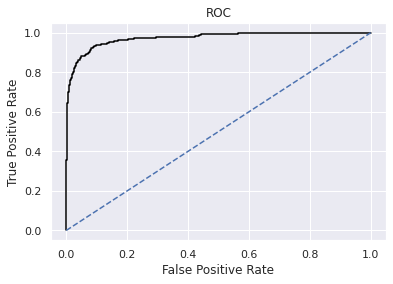

In [293]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid_mlp.predict_proba(x_test_scaled)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid_mlp.predict(x_test_scaled))
print('Area under Curve is', nn_test_auc)

In [294]:
best_grid_mlp.score

<bound method ClassifierMixin.score of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)>

# <font color = Green> <b> Building Logistic Regression model

In [295]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.001,0.0001]}

In [296]:
model = LogisticRegression(max_iter=10000,n_jobs=-1,random_state=1,)

In [297]:
grid_search_lr = GridSearchCV(estimator = model, param_grid = grid, cv = 8,n_jobs=-1,scoring='f1')

In [298]:
grid_search_lr.fit(x_train_bal, y_train_bal)



GridSearchCV(cv=8, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [299]:
print(grid_search_lr.best_params_,'\n')
print(grid_search_lr.best_estimator_)

{'penalty': 'l2', 'solver': 'saga', 'tol': 0.001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='saga', tol=0.001, verbose=0, warm_start=False)


In [300]:
best_model_lr = grid_search_lr.best_estimator_

In [301]:
# Prediction on the training set

ytrain_predict_lr = best_model_lr.predict(x_train_bal)
ytest_predict_lr = best_model_lr.predict(x_test_treated2)

In [302]:
## Getting the probabilities on the test set

ytest_predict_lr_prob=best_model_lr.predict_proba(x_test_treated2)
pd.DataFrame(ytest_predict_lr_prob).head()

0         1
0  0.193804  0.806196
1  0.172011  0.827989
2  0.683579  0.316421
3  0.341409  0.658591
4  0.920052  0.079948

#### <font color="red">*Checking Performance matrix for Logistic Regression Model*

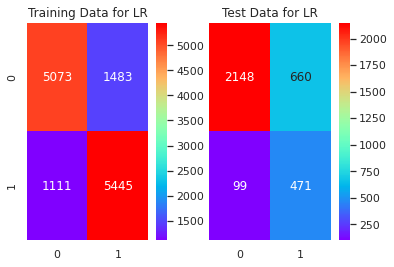

In [303]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_lr)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for LR')

#Plotting confusion matrix for the different models for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_lr)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for LR');

In [304]:
## Classification Report on the training data
print('Classification Report of the training data of Logisitic Regression Model:\n\n',classification_report(y_train_bal, ytrain_predict_lr),'\n');

Classification Report of the training data of Logisitic Regression Model:

               precision    recall  f1-score   support

           0       0.82      0.77      0.80      6556
           1       0.79      0.83      0.81      6556

    accuracy                           0.80     13112
   macro avg       0.80      0.80      0.80     13112
weighted avg       0.80      0.80      0.80     13112
 



In [305]:
# Accuracy - Train Data
lr_train_acc=best_model_lr.score(x_train_bal, y_train_bal)
lr_train_acc

0.8021659548505186

In [306]:
lr_train_metrics=classification_report(y_train_bal, ytrain_predict_lr,output_dict=True)
df=pd.DataFrame(lr_train_metrics).transpose()
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.79
lr_train_recall  0.83
lr_train_f1  0.81


In [307]:
## Classification Report on the test data
print('Classification Report of the test data of Logisitic Regression Model:\n\n',classification_report(y_test, ytest_predict_lr));

Classification Report of the test data of Logisitic Regression Model:

               precision    recall  f1-score   support

           0       0.96      0.76      0.85      2808
           1       0.42      0.83      0.55       570

    accuracy                           0.78      3378
   macro avg       0.69      0.80      0.70      3378
weighted avg       0.86      0.78      0.80      3378



In [308]:
# Accuracy - Test Data
lr_test_acc=best_model_lr.score(x_test_treated2, y_test)
lr_test_acc

0.7753108348134992

In [309]:
lr_test_metrics=classification_report(y_test, ytest_predict_lr,output_dict=True)
df=pd.DataFrame(lr_test_metrics).transpose()
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.42
lr_test_recall  0.83
lr_test_f1  0.55


#### <font color="red"> *AUC and ROC for the training data on Logistic Regression Model*

AUC for Linear Regression Train Data: 0.877


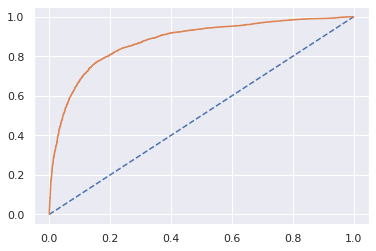

In [310]:
# predict probabilities
probs = best_model_lr.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train_bal, probs)
print('AUC for Logisitic Regression Train Data: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train_bal, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Logistic Regression Model*

AUC for Linear Regression Test Data: 0.869


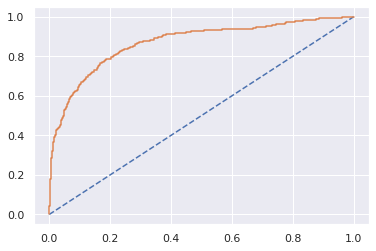

In [311]:
# predict probabilities
probs = best_model_lr.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC for Logistic Regression Test Data: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr);

#### <font color="red"> *Getting co-efficients and Intercepts of Logisitic regression Model*

In [312]:
model_lr = LogisticRegression(max_iter=10000,n_jobs=2,random_state=1,penalty='l2', solver= 'saga', tol= 0.0001)

In [313]:
model_lr.fit(x_train_bal, y_train_bal)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2', random_state=1,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [314]:
model_lr.coef_

array([[-0.15561218,  0.34873322,  0.01724121, -0.12908059,  0.07154869,
        -0.21358917,  0.33615272, -0.44496   ,  0.26571442,  0.4240416 ,
         0.12395866,  1.63258432, -0.04665745,  0.25369599, -0.09663779,
        -0.0048563 , -0.20806153]])

In [315]:
model_lr.intercept_

array([-0.36006129])

In [316]:
#Performance outcomes of Logistic Regression Model
model_param_lr_train=lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1
model_param_lr_test=lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1
print(model_param_lr_train)
print(model_param_lr_test)

(0.8021659548505186, 0.877021072686399, 0.83, 0.79, 0.81)
(0.7753108348134992, 0.8686847103513771, 0.83, 0.42, 0.55)


# <font color = Green> <b> **Building a KNN Model**

In [317]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled2, y_train_bal)
    # evaluate test accuracy
    scores = knn.score(x_test_scaled, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.04499703966844282,
 0.039076376554174064,
 0.07578448786264058,
 0.06660746003552398,
 0.10894020130254589,
 0.09828300769686205,
 0.13883955002960335,
 0.12670219064535226,
 0.1651865008880995,
 0.1503848431024275,
 0.18857312018946126,
 0.1752516281823564,
 0.20722320899940794,
 0.19508584961515685,
 0.22172883362936646,
 0.20959147424511548,
 0.23445825932504438,
 0.2205447010065127,
 0.24955595026642985]

#### <font color = "Blue"> *Plotting misclassification error vs k (with k value on X-axis)*

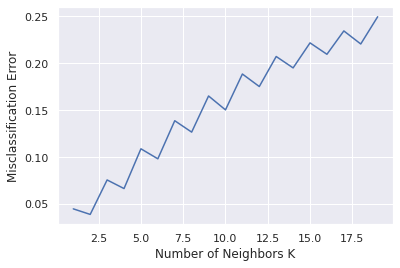

In [318]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,1), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### <font color = "Navy Blue"> *From the above graph the optimal value of k comes out to be 2

In [319]:
Model_knn=KNeighborsClassifier(n_neighbors=2)
Model_knn.fit(x_train_scaled2,y_train_bal)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [320]:
ytrain_predict_knn = Model_knn.predict(x_train_scaled2)
ytest_predict_knn = Model_knn.predict(x_test_scaled)

#### <font color="red">***Checking Performance matrix, AUC and ROC for KNN Model***

#### <font color="red">*Checking Performance matrix for KNN Model*

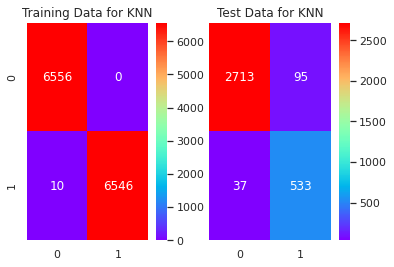

In [321]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the KNN model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_knn)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for KNN')

#Plotting confusion matrix for the KNN model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_knn)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for KNN');

In [322]:
## Classification Report on the train data
print('Classification Report of the train data of KNN Model:\n\n',classification_report(y_train_bal, ytrain_predict_knn));

Classification Report of the train data of KNN Model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



In [323]:
# Accuracy - Train Data
knn_train_acc=Model_knn.score(x_train_scaled2, y_train_bal)
knn_train_acc

0.9992373398413666

In [324]:
knn_train_metrics=classification_report(y_train_bal, ytrain_predict_knn,output_dict=True)
df_knn=pd.DataFrame(knn_train_metrics).transpose()
knn_train_precision=round(df_knn.loc["1"][0],2)
knn_train_recall=round(df_knn.loc["1"][1],2)
knn_train_f1=round(df_knn.loc["1"][2],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  1.0
knn_train_recall  1.0
knn_train_f1  1.0


In [325]:
## Classification Report on the test data
print('Classification Report of the test data of KNN Model:\n\n',classification_report(y_test, ytest_predict_knn));


Classification Report of the test data of KNN Model:

               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2808
           1       0.85      0.94      0.89       570

    accuracy                           0.96      3378
   macro avg       0.92      0.95      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [326]:
# Accuracy - Test Data
knn_test_acc=Model_knn.score(x_test_scaled, y_test)
knn_test_acc

0.9609236234458259

In [327]:
knn_test_metrics=classification_report(y_test, ytest_predict_knn,output_dict=True)
df_knn_t=pd.DataFrame(knn_test_metrics).transpose()
knn_test_precision=round(df_knn_t.loc["1"][0],2)
knn_test_recall=round(df_knn_t.loc["1"][1],2)
knn_test_f1=round(df_knn_t.loc["1"][2],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.85
knn_test_recall  0.94
knn_test_f1  0.89


#### <font color="red"> *AUC and ROC for the training data on KNN Model*

AUC for KNN Train Data: 1.000


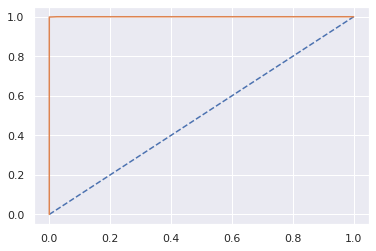

In [328]:
# predict probabilities
probs_knn_tr = Model_knn.predict_proba(x_train_scaled2)
# keep probabilities for the positive outcome only
probs_knn_tr = probs_knn_tr[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train_bal, probs_knn_tr)
print('AUC for KNN Train Data: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train_bal, probs_knn_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr);

#### <font color="red">*AUC and ROC for the test data on KNN Model*

AUC for KNN Test Data: 0.967


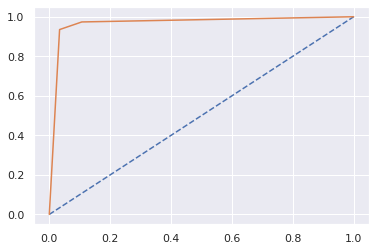

In [329]:
# predict probabilities
probs_knn_t = Model_knn.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
probs_knn_t = probs_knn_t[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs_knn_t)
print('AUC for KNN Test Data: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs_knn_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr);

In [330]:
#Performance outcomes of KNN Model
model_param_knn_train=knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1
model_param_knn_test=knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1
print(model_param_knn_train)
print(model_param_knn_test)

(0.9992373398413666, 0.9999802238824027, 1.0, 1.0, 1.0)
(0.9609236234458259, 0.9669037711800871, 0.94, 0.85, 0.89)


# <font color = Green> <b>Trying smote dataset on Enseamble models

# <font color = Green> <b> Building a Random Forest Classifier

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [331]:
from sklearn.model_selection import GridSearchCV
 
param_grid_rfcl = {
    'max_depth': [40],
    'max_features': [8,9],
    'min_samples_leaf': [4,5], 
    'min_samples_split': [12,15],
    'n_estimators': [150,160]
}
 
rfcl = RandomForestClassifier()
 
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [332]:
grid_search_rfcl.fit(x_train_bal, y_train_bal)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [333]:
grid_search_rfcl.best_params_

{'max_depth': 40,
 'max_features': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 150}

In [334]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [335]:
best_grid_rfcl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## <font color="Green"> Predicting the Training and Testing data using Random Forest Classifcation

In [336]:
ytrain_predict_rf = best_grid_rfcl.predict(x_train_bal)
ytest_predict_rf = best_grid_rfcl.predict(x_test_treated2)

## RF Model Performance Evaluation on Training data

In [337]:
confusion_matrix(y_train_bal,ytrain_predict_rf)

array([[6486,   70],
       [  60, 6496]])

In [338]:
rf_train_acc=best_grid_rfcl.score(x_train_bal,y_train_bal) 
rf_train_acc

0.9900854179377669

In [339]:
print(classification_report(y_train_bal,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6556
           1       0.99      0.99      0.99      6556

    accuracy                           0.99     13112
   macro avg       0.99      0.99      0.99     13112
weighted avg       0.99      0.99      0.99     13112



In [341]:
rf_metrics=classification_report(y_train_bal, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.99
rf_train_recall  0.99
rf_train_f1  0.99


Area under Curve is 0.9900854179377668


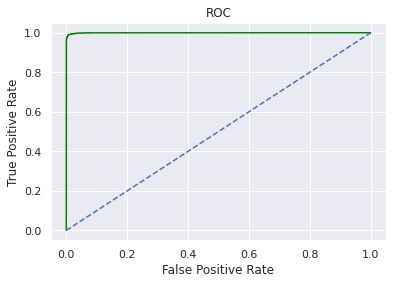

In [342]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train_bal,best_grid_rfcl.predict_proba(x_train_bal)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train_bal,best_grid_rfcl.predict(x_train_bal))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [343]:
confusion_matrix(y_test,ytest_predict_rf)

array([[2742,   66],
       [  87,  483]])

In [344]:
rf_test_acc=best_grid_rfcl.score(x_test_treated2,y_test)
rf_test_acc

0.9547069271758437

In [345]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2808
           1       0.88      0.85      0.86       570

    accuracy                           0.95      3378
   macro avg       0.92      0.91      0.92      3378
weighted avg       0.95      0.95      0.95      3378



In [346]:
rf_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.iloc[1][0],2)
rf_test_recall=round(df.iloc[1][1],2)
rf_test_f1=round(df.iloc[1][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.88
rf_test_recall  0.85
rf_test_f1  0.86


Area under Curve is 0.911932073774179


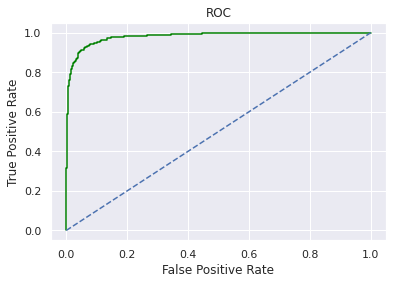

In [347]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(x_test_treated2)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict(x_test_treated2))
print('Area under Curve is', rf_test_auc)

In [348]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = x_train_bal.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.350646
Complain_ly              0.179453
Marital_Status           0.064059
CC_Agent_Score           0.051155
account_segment          0.048054
Day_Since_CC_connect     0.046198
rev_per_month            0.037751
Payment                  0.032001
City_Tier                0.031694
CC_Contacted_LY          0.029724
cashback                 0.029069
rev_growth_yoy           0.026935
Account_user_count       0.020180
Login_device             0.018064
coupon_used_for_payment  0.014094
Gender                   0.013472
Service_Score            0.007449


## <font color = Green> <i> Building a Random Forest Classifier without unwanted features

In [426]:
x_train_new2=x_train_bal.drop(['coupon_used_for_payment','Login_device','Gender','Service_Score'],axis=1)
x_test_new=x_test_treated2.drop(['coupon_used_for_payment','Login_device','Gender','Service_Score'],axis=1)

In [427]:
x_train_new2.shape

(13112, 13)

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will lead to performance issues and model will run for much longer time

In [428]:
from sklearn.model_selection import GridSearchCV
 
param_grid_rfcl = {
    'max_depth': [40],
    'max_features': [8,9],
    'min_samples_leaf': [4,5], 
    'min_samples_split': [12,15],
    'n_estimators': [150,160]
}
 
rfcl = RandomForestClassifier()
 
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 3)

In [429]:
grid_search_rfcl.fit(x_train_new2, y_train_bal)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [430]:
grid_search_rfcl.best_params_

{'max_depth': 40,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 150}

In [431]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [432]:
best_grid_rfcl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## <font color="Green"> Predicting the Training and Testing data using Random Forest Classifcation

In [433]:
ytrain_predict_rf = best_grid_rfcl.predict(x_train_new2)
ytest_predict_rf = best_grid_rfcl.predict(x_test_new)

## RF Model Performance Evaluation on Training data

In [434]:
confusion_matrix(y_train_bal,ytrain_predict_rf)

array([[6465,   91],
       [  68, 6488]])

In [435]:
rf_train_acc=best_grid_rfcl.score(x_train_new2,y_train_bal) 
rf_train_acc

0.9878737034777303

In [436]:
print(classification_report(y_train_bal,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6556
           1       0.99      0.99      0.99      6556

    accuracy                           0.99     13112
   macro avg       0.99      0.99      0.99     13112
weighted avg       0.99      0.99      0.99     13112



In [437]:
rf_metrics=classification_report(y_train_bal, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df.head()

precision    recall  f1-score       support
0              0.989591  0.986120  0.987852   6556.000000
1              0.986168  0.989628  0.987895   6556.000000
accuracy       0.987874  0.987874  0.987874      0.987874
macro avg      0.987880  0.987874  0.987874  13112.000000
weighted avg   0.987880  0.987874  0.987874  13112.000000

In [438]:
rf_metrics=classification_report(y_train_bal, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.99
rf_train_recall  0.99
rf_train_f1  0.99


Area under Curve is 0.9878737034777303


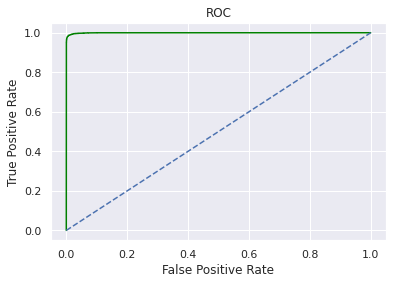

In [439]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train_bal,best_grid_rfcl.predict_proba(x_train_new2)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train_bal,best_grid_rfcl.predict(x_train_new2))
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [440]:
confusion_matrix(y_test,ytest_predict_rf)

array([[2722,   86],
       [  84,  486]])

In [441]:
rf_test_acc=best_grid_rfcl.score(x_test_new,y_test)
rf_test_acc

0.9496743635287153

In [442]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2808
           1       0.85      0.85      0.85       570

    accuracy                           0.95      3378
   macro avg       0.91      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



In [443]:
rf_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.iloc[1][0],2)
rf_test_recall=round(df.iloc[1][1],2)
rf_test_f1=round(df.iloc[1][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.85
rf_test_recall  0.85
rf_test_f1  0.85


Area under Curve is 0.9110023991602939


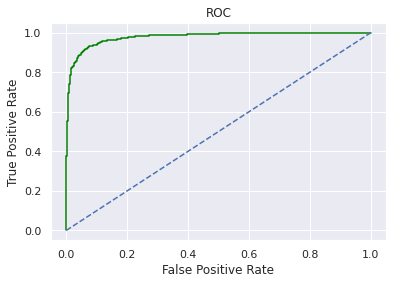

In [444]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(x_test_new)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict(x_test_new))
print('Area under Curve is', rf_test_auc)

In [445]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = x_train_new2.columns).sort_values('Imp',ascending=False))

                           Imp
Tenure                0.379675
Complain_ly           0.174549
Marital_Status        0.071710
CC_Agent_Score        0.055411
Day_Since_CC_connect  0.046894
rev_per_month         0.041389
account_segment       0.040770
CC_Contacted_LY       0.035041
Payment               0.034080
cashback              0.033307
rev_growth_yoy        0.032518
City_Tier             0.030558
Account_user_count    0.024098


# <font color = Green> <b> **Building Ada Boost Model**

In [369]:
Model_adb = AdaBoostClassifier(n_estimators=15,random_state=1,learning_rate=0.001)
Model_adb.fit(x_train_bal,y_train_bal)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=15, random_state=1)

In [370]:
ytrain_predict_adb = Model_adb.predict(x_train_bal)
ytest_predict_adb = Model_adb.predict(x_test_treated2)

#### <font color="red">***Checking Performance matrix, AUC and ROC for AdaBoosting Model***

#### <font color="red">*Checking Performance matrix for AdaBoosting Model*

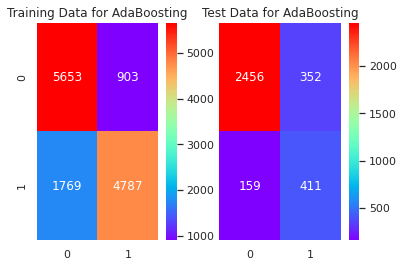

In [371]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the AdaBoosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_adb)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for AdaBoosting')

#Plotting confusion matrix for the AdaBoosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_adb)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for AdaBoosting');

In [372]:
## Classification Report on the train data
print('Classification Report of the train data of AdaBoosting Model:\n\n',classification_report(y_train_bal, ytrain_predict_adb));

Classification Report of the train data of AdaBoosting Model:

               precision    recall  f1-score   support

           0       0.76      0.86      0.81      6556
           1       0.84      0.73      0.78      6556

    accuracy                           0.80     13112
   macro avg       0.80      0.80      0.80     13112
weighted avg       0.80      0.80      0.80     13112



In [373]:
# Accuracy - Train Data
adb_train_acc=Model_adb.score(x_train_bal, y_train_bal)
adb_train_acc

0.7962172056131788

In [374]:
adb_train_metrics=classification_report(y_train_bal, ytrain_predict_adb,output_dict=True)
df_adb=pd.DataFrame(adb_train_metrics).transpose()
adb_train_precision=round(df_adb.loc["1"][0],2)
adb_train_recall=round(df_adb.loc["1"][1],2)
adb_train_f1=round(df_adb.loc["1"][2],2)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)

adb_train_precision  0.84
adb_train_recall  0.73
adb_train_f1  0.78


In [375]:
## Classification Report on the test data
print('Classification Report of the test data of AdaBoosting Model:\n\n',classification_report(y_test, ytest_predict_adb));


Classification Report of the test data of AdaBoosting Model:

               precision    recall  f1-score   support

           0       0.94      0.87      0.91      2808
           1       0.54      0.72      0.62       570

    accuracy                           0.85      3378
   macro avg       0.74      0.80      0.76      3378
weighted avg       0.87      0.85      0.86      3378



In [376]:
# Accuracy - Test Data
adb_test_acc=Model_adb.score(x_test_treated2, y_test)
adb_test_acc

0.8487270574304322

In [377]:
adb_test_metrics=classification_report(y_test, ytest_predict_adb,output_dict=True)
df_adb_t=pd.DataFrame(adb_test_metrics).transpose()
adb_test_precision=round(df_adb_t.loc["1"][0],2)
adb_test_recall=round(df_adb_t.loc["1"][1],2)
adb_test_f1=round(df_adb_t.loc["1"][2],2)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_test_precision  0.54
adb_test_recall  0.72
adb_test_f1  0.62


#### <font color="red"> *AUC and ROC for the training data on AdaBoosting Model*

AUC for AdaBoosting Train Data: 0.796


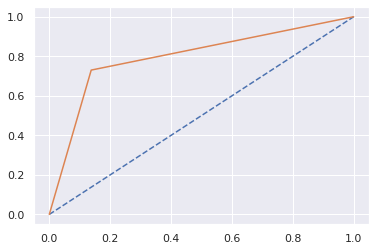

In [378]:
# predict probabilities
probs_adb_tr = Model_adb.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs_adb_tr = probs_adb_tr[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train_bal, probs_adb_tr)
print('AUC for AdaBoosting Train Data: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train_bal, probs_adb_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr);

#### <font color="red">*AUC and ROC for the test data on AdaBoosting Model*





AUC for AdaBoosting Test Data: 0.798


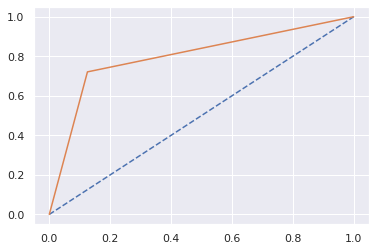

In [379]:
# predict probabilities
probs_adb_t = Model_adb.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_adb_t = probs_adb_t[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs_adb_t)
print('AUC for AdaBoosting Test Data: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_test_thresholds = roc_curve(y_test, probs_adb_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr);

In [380]:
model_param_adb_train=adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1
model_param_adb_test=adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1
print(model_param_adb_train)
print(model_param_adb_test)

(0.7962172056131788, 0.7962172056131788, 0.73, 0.84, 0.78)
(0.8487270574304322, 0.797848253111411, 0.72, 0.54, 0.62)


In [381]:
# Variable Importance
print (pd.DataFrame(Model_adb.feature_importances_, columns = ["Imp"], index = x_train_bal.columns).sort_values('Imp',ascending=False))

                         Imp
Tenure                   1.0
Marital_Status           0.0
cashback                 0.0
Day_Since_CC_connect     0.0
coupon_used_for_payment  0.0
rev_growth_yoy           0.0
Complain_ly              0.0
rev_per_month            0.0
CC_Agent_Score           0.0
City_Tier                0.0
account_segment          0.0
Account_user_count       0.0
Service_Score            0.0
Gender                   0.0
Payment                  0.0
CC_Contacted_LY          0.0
Login_device             0.0


# <font color = Green> <b> **Building Gradient Boosting Model**

In [382]:
from sklearn.ensemble import GradientBoostingClassifier
Model_gbcl = GradientBoostingClassifier(random_state=1,learning_rate=0.1, n_estimators=5000)
Model_gbcl = Model_gbcl.fit(x_train_bal, y_train_bal)

In [383]:
ytrain_predict_gbcl = Model_gbcl.predict(x_train_bal)
ytest_predict_gbcl = Model_gbcl.predict(x_test_treated2)


#### <font color="red">***Checking Performance matrix, AUC and ROC for Gradient Boosting Model***

#### <font color="red">*Checking Performance matrix for Gradient Boosting Model*

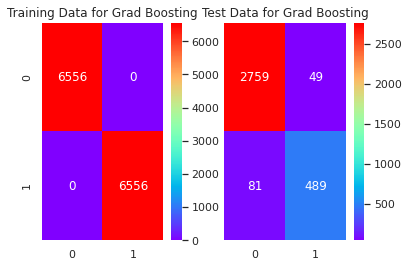

In [384]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Gradient Boosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Grad Boosting')

#Plotting confusion matrix for the Gradient Boosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Grad Boosting');

In [385]:
## Classification Report on the train data
print('Classification Report of the train data of Gradient Boosting Model:\n\n',classification_report(y_train_bal, ytrain_predict_gbcl));

Classification Report of the train data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



In [386]:
# Accuracy - Train Data
gbcl_train_acc=Model_gbcl.score(x_train_bal, y_train_bal)
gbcl_train_acc

1.0

In [387]:
gbcl_train_metrics=classification_report(y_train_bal, ytrain_predict_gbcl,output_dict=True)
df_gbcl=pd.DataFrame(gbcl_train_metrics).transpose()
gbcl_train_precision=round(df_gbcl.loc["1"][0],2)
gbcl_train_recall=round(df_gbcl.loc["1"][1],2)
gbcl_train_f1=round(df_gbcl.loc["1"][2],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  1.0
gbcl_train_recall  1.0
gbcl_train_f1  1.0


In [388]:
## Classification Report on the test data
print('Classification Report of the test data of Gradient Boosting Model:\n\n',classification_report(y_test, ytest_predict_gbcl));


Classification Report of the test data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2808
           1       0.91      0.86      0.88       570

    accuracy                           0.96      3378
   macro avg       0.94      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [389]:
# Accuracy - Test Data
gbcl_test_acc=Model_gbcl.score(x_test_treated2, y_test)
gbcl_test_acc

0.9615156897572528

In [390]:
gbcl_test_metrics=classification_report(y_test, ytest_predict_gbcl,output_dict=True)
df_gbcl_t=pd.DataFrame(gbcl_test_metrics).transpose()
gbcl_test_precision=round(df_gbcl_t.loc["1"][0],2)
gbcl_test_recall=round(df_gbcl_t.loc["1"][1],2)
gbcl_test_f1=round(df_gbcl_t.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.91
gbcl_test_recall  0.86
gbcl_test_f1  0.88


#### <font color="red"> *AUC and ROC for the training data on Gradient Boosting Model*

AUC for Gradient Train Data: 1.000


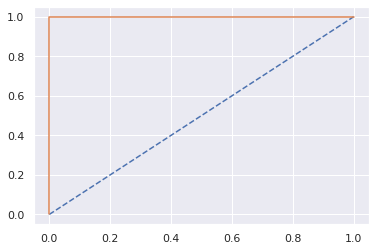

In [391]:
# predict probabilities
probs_gbcl_tr = Model_gbcl.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs_gbcl_tr = probs_gbcl_tr[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train_bal, probs_gbcl_tr)
print('AUC for Gradient Train Data: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train_bal, probs_gbcl_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Gradient Boosting Model*





AUC for Gradient Test Data: 0.988


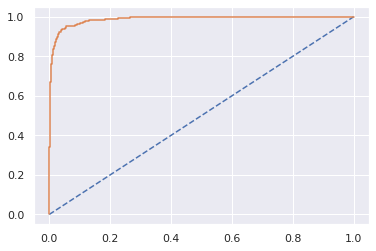

In [392]:
# predict probabilities
probs_gbcl_t = Model_gbcl.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_gbcl_t = probs_gbcl_t[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs_gbcl_t)
print('AUC for Gradient Test Data: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test, probs_gbcl_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr);

In [393]:
model_param_gbcl_train=gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1
model_param_gbcl_test=gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1
print(model_param_gbcl_train)
print(model_param_gbcl_test)

(1.0, 1.0, 1.0, 1.0, 1.0)
(0.9615156897572528, 0.9875793472284701, 0.86, 0.91, 0.88)


In [394]:
# Variable Importance
print (pd.DataFrame(Model_gbcl.feature_importances_, columns = ["Imp"], index = x_train_bal.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.464863
Complain_ly              0.160264
Marital_Status           0.082536
rev_per_month            0.038972
account_segment          0.036752
CC_Agent_Score           0.035147
City_Tier                0.030378
Day_Since_CC_connect     0.030092
Payment                  0.019519
Account_user_count       0.019214
coupon_used_for_payment  0.016644
Login_device             0.015654
rev_growth_yoy           0.015189
cashback                 0.013130
CC_Contacted_LY          0.011653
Gender                   0.006934
Service_Score            0.003058


'coupon_used_for_payment','Login_device',

In [395]:
x_train_new2=x_train_bal.drop(['CC_Contacted_LY','Gender','Service_Score'],axis=1)
x_test_new2=x_test_treated2.drop(['CC_Contacted_LY','Gender','Service_Score'],axis=1)

In [396]:
from sklearn.ensemble import GradientBoostingClassifier
Model_gbcl = GradientBoostingClassifier(random_state=1,learning_rate=0.1, n_estimators=5000)
Model_gbcl = Model_gbcl.fit(x_train_new2, y_train_bal)

In [397]:
ytrain_predict_gbcl = Model_gbcl.predict(x_train_new2)
ytest_predict_gbcl = Model_gbcl.predict(x_test_new2)


#### <font color="red">***Checking Performance matrix, AUC and ROC for Gradient Boosting Model***

#### <font color="red">*Checking Performance matrix for Gradient Boosting Model*

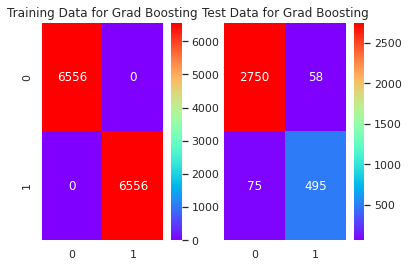

In [398]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Gradient Boosting model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Grad Boosting')

#Plotting confusion matrix for the Gradient Boosting model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_gbcl)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Grad Boosting');

In [399]:
## Classification Report on the train data
print('Classification Report of the train data of Gradient Boosting Model:\n\n',classification_report(y_train_bal, ytrain_predict_gbcl));

Classification Report of the train data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      6556

    accuracy                           1.00     13112
   macro avg       1.00      1.00      1.00     13112
weighted avg       1.00      1.00      1.00     13112



In [400]:
# Accuracy - Train Data
gbcl_train_acc=Model_gbcl.score(x_train_new2, y_train_bal)
gbcl_train_acc

1.0

In [401]:
gbcl_train_metrics=classification_report(y_train_bal, ytrain_predict_gbcl,output_dict=True)
df_gbcl=pd.DataFrame(gbcl_train_metrics).transpose()
gbcl_train_precision=round(df_gbcl.loc["1"][0],2)
gbcl_train_recall=round(df_gbcl.loc["1"][1],2)
gbcl_train_f1=round(df_gbcl.loc["1"][2],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_train_precision  1.0
gbcl_train_recall  1.0
gbcl_train_f1  1.0


In [402]:
## Classification Report on the test data
print('Classification Report of the test data of Gradient Boosting Model:\n\n',classification_report(y_test, ytest_predict_gbcl));


Classification Report of the test data of Gradient Boosting Model:

               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2808
           1       0.90      0.87      0.88       570

    accuracy                           0.96      3378
   macro avg       0.93      0.92      0.93      3378
weighted avg       0.96      0.96      0.96      3378



In [403]:
# Accuracy - Test Data
gbcl_test_acc=Model_gbcl.score(x_test_new2, y_test)
gbcl_test_acc

0.9606275902901125

In [404]:
gbcl_test_metrics=classification_report(y_test, ytest_predict_gbcl,output_dict=True)
df_gbcl_t=pd.DataFrame(gbcl_test_metrics).transpose()
gbcl_test_precision=round(df_gbcl_t.loc["1"][0],2)
gbcl_test_recall=round(df_gbcl_t.loc["1"][1],2)
gbcl_test_f1=round(df_gbcl_t.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_test_precision  0.9
gbcl_test_recall  0.87
gbcl_test_f1  0.88


#### <font color="red"> *AUC and ROC for the training data on Gradient Boosting Model*

AUC for Gradient Train Data: 1.000


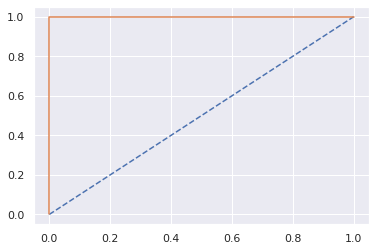

In [405]:
# predict probabilities
probs_gbcl_tr = Model_gbcl.predict_proba(x_train_new2)
# keep probabilities for the positive outcome only
probs_gbcl_tr = probs_gbcl_tr[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train_bal, probs_gbcl_tr)
print('AUC for Gradient Train Data: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train_bal, probs_gbcl_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Gradient Boosting Model*





AUC for Gradient Test Data: 0.985


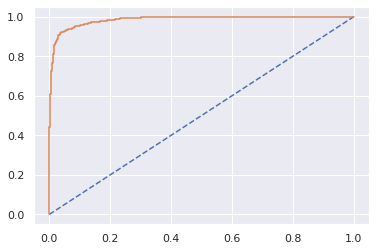

In [406]:
# predict probabilities
probs_gbcl_t = Model_gbcl.predict_proba(x_test_new2)
# keep probabilities for the positive outcome only
probs_gbcl_t = probs_gbcl_t[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs_gbcl_t)
print('AUC for Gradient Test Data: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = roc_curve(y_test, probs_gbcl_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr);

In [407]:
model_param_gbcl_train=gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1
model_param_gbcl_test=gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1
print(model_param_gbcl_train)
print(model_param_gbcl_test)

(1.0, 1.0, 1.0, 1.0, 1.0)
(0.9606275902901125, 0.9848652971459988, 0.87, 0.9, 0.88)


In [408]:
# Variable Importance
print (pd.DataFrame(Model_gbcl.feature_importances_, columns = ["Imp"], index =x_train_new2.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.467522
Complain_ly              0.160457
Marital_Status           0.085246
rev_per_month            0.038536
account_segment          0.037901
CC_Agent_Score           0.037365
Day_Since_CC_connect     0.033053
City_Tier                0.030746
Account_user_count       0.021147
Payment                  0.019910
coupon_used_for_payment  0.019902
Login_device             0.017043
rev_growth_yoy           0.015683
cashback                 0.015488


# <font color = Green> <b> **Building a Bagging Model**

In [409]:
RF_model=RandomForestClassifier(min_samples_leaf=20,min_samples_split=60)
Model_bagg=BaggingClassifier(base_estimator=RF_model,n_estimators=50,random_state=1)


In [410]:
Model_bagg.fit(x_train_bal, y_train_bal)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=20,
                                                        min_samples_split=60,
                                                        min_weight_fraction_leaf=0.0,
   

In [411]:
ytrain_predict_bagg = Model_bagg.predict(x_train_bal)
ytest_predict_bagg = Model_bagg.predict(x_test_treated2)

#### <font color="red">***Checking Performance matrix, AUC and ROC for Bagging Model***

#### <font color="red">*Checking Performance matrix for Bagging Model*

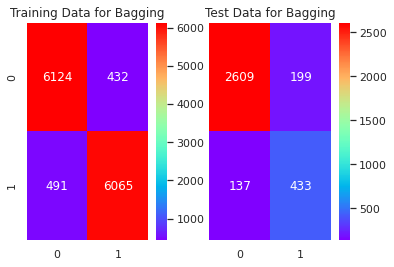

In [412]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the Bagging model for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train_bal,ytrain_predict_bagg)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][0]);
a[0][0].set_title('Training Data for Bagging')

#Plotting confusion matrix for the Bagging model for the Test Data

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict_bagg)),annot=True,fmt='.5g',cmap='rainbow',ax=a[0][1]);
a[0][1].set_title('Test Data for Bagging');

In [413]:
## Classification Report on the train data
print('Classification Report of the train data of Bagging Model:\n\n',classification_report(y_train_bal, ytrain_predict_bagg));

Classification Report of the train data of Bagging Model:

               precision    recall  f1-score   support

           0       0.93      0.93      0.93      6556
           1       0.93      0.93      0.93      6556

    accuracy                           0.93     13112
   macro avg       0.93      0.93      0.93     13112
weighted avg       0.93      0.93      0.93     13112



In [414]:
# Accuracy - Train Data
bagg_train_acc=Model_bagg.score(x_train_bal, y_train_bal)
bagg_train_acc

0.9296064673581452

In [415]:
bagg_train_metrics=classification_report(y_train_bal, ytrain_predict_bagg,output_dict=True)
df_bagg=pd.DataFrame(bagg_train_metrics).transpose()
bagg_train_precision=round(df_bagg.loc["1"][0],2)
bagg_train_recall=round(df_bagg.loc["1"][1],2)
bagg_train_f1=round(df_bagg.loc["1"][2],2)
print ('bagg_train_precision ',bagg_train_precision)
print ('bagg_train_recall ',bagg_train_recall)
print ('bagg_train_f1 ',bagg_train_f1)

bagg_train_precision  0.93
bagg_train_recall  0.93
bagg_train_f1  0.93


In [416]:
## Classification Report on the test data
print('Classification Report of the test data of Bagging Model:\n\n',classification_report(y_test, ytest_predict_bagg));


Classification Report of the test data of Bagging Model:

               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2808
           1       0.69      0.76      0.72       570

    accuracy                           0.90      3378
   macro avg       0.82      0.84      0.83      3378
weighted avg       0.91      0.90      0.90      3378



In [417]:
# Accuracy - Test Data
bagg_test_acc=Model_bagg.score(x_test_treated2, y_test)
bagg_test_acc

0.9005328596802842

In [418]:
bagg_test_metrics=classification_report(y_test, ytest_predict_bagg,output_dict=True)
df_bagg_t=pd.DataFrame(bagg_test_metrics).transpose()
bagg_test_precision=round(df_bagg_t.loc["1"][0],2)
bagg_test_recall=round(df_bagg_t.loc["1"][1],2)
bagg_test_f1=round(df_bagg_t.loc["1"][2],2)
print ('bagg_test_precision ',bagg_test_precision)
print ('bagg_test_recall ',bagg_test_recall)
print ('bagg_test_f1 ',bagg_test_f1)

bagg_test_precision  0.69
bagg_test_recall  0.76
bagg_test_f1  0.72


#### <font color="red"> *AUC and ROC for the training data on Bagging Model*

AUC for Bagging Train Data: 0.984


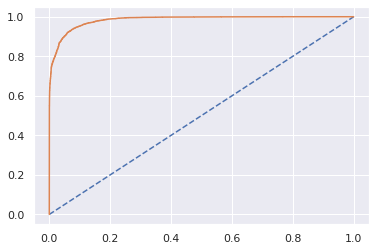

In [419]:
# predict probabilities
probs_bagg_tr = Model_bagg.predict_proba(x_train_bal)
# keep probabilities for the positive outcome only
probs_bagg_tr = probs_bagg_tr[:, 1]
# calculate AUC
bagg_train_auc = roc_auc_score(y_train_bal, probs_bagg_tr)
print('AUC for Bagging Train Data: %.3f' % bagg_train_auc)
# calculate roc curve
bagg_train_fpr, bagg_train_tpr, bagg_train_thresholds = roc_curve(y_train_bal, probs_bagg_tr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagg_train_fpr, bagg_train_tpr);

#### <font color="red">*AUC and ROC for the test data on Bagging Model*





AUC for Bagging Test Data: 0.938


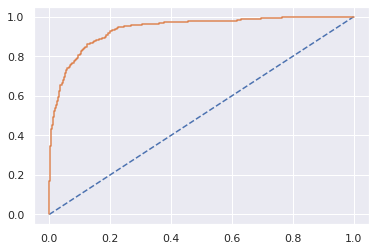

In [420]:
# predict probabilities
probs_bagg_t = Model_bagg.predict_proba(x_test_treated2)
# keep probabilities for the positive outcome only
probs_bagg_t = probs_bagg_t[:, 1]
# calculate AUC
bagg_test_auc = roc_auc_score(y_test, probs_bagg_t)
print('AUC for Bagging Test Data: %.3f' % bagg_test_auc)
# calculate roc curve
bagg_test_fpr, bagg_test_tpr, bagg_test_thresholds = roc_curve(y_test, probs_bagg_t)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bagg_test_fpr, bagg_test_tpr);

In [421]:
model_param_bagg_train=bagg_train_acc,bagg_train_auc,bagg_train_recall,bagg_train_precision,bagg_train_f1
model_param_bagg_test=bagg_test_acc,bagg_test_auc,bagg_test_recall,bagg_test_precision,bagg_test_f1
print(model_param_bagg_train)
print(model_param_bagg_test)

(0.9296064673581452, 0.9836219545244222, 0.93, 0.93, 0.93)
(0.9005328596802842, 0.9376112110761233, 0.76, 0.69, 0.72)


# <font color = Green> <b> Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve

# <font color="red"> <b> Model Performance of general methods

In [446]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1],
        'Log_Reg Train':model_param_lr_train,
        'Log_Reg Test':model_param_lr_test,
        'KNN Train':model_param_knn_train,
        'KNN Test':model_param_knn_test},index=index)
round(data,2)

CART Train  CART Test  ...  KNN Train  KNN Test
Accuracy         0.98       0.92  ...        1.0      0.96
AUC              1.00       0.91  ...        1.0      0.97
Recall           0.98       0.77  ...        1.0      0.94
Precision        0.99       0.75  ...        1.0      0.85
F1 Score         0.98       0.76  ...        1.0      0.89

[5 rows x 8 columns]

# <font color="red"> <b> Model Performance of Enseamble methods

In [447]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Bagging Train':model_param_bagg_train,
        'Bagging Test':model_param_bagg_test,
        'AdaBoosting Train':model_param_adb_train,
        'AdaBoosting Test':model_param_adb_test,
        'Gradient Boosting Train':model_param_gbcl_train,
        'Gradient Boosting Test':model_param_gbcl_test},index=index)
round(data,2)

Random Forest Train  ...  Gradient Boosting Test
Accuracy                  0.99  ...                    0.96
AUC                       0.99  ...                    0.98
Recall                    0.99  ...                    0.87
Precision                 0.99  ...                    0.90
F1 Score                  0.99  ...                    0.88

[5 rows x 8 columns]

#### <font color="red">***ROC Curve for all models on the Test data***

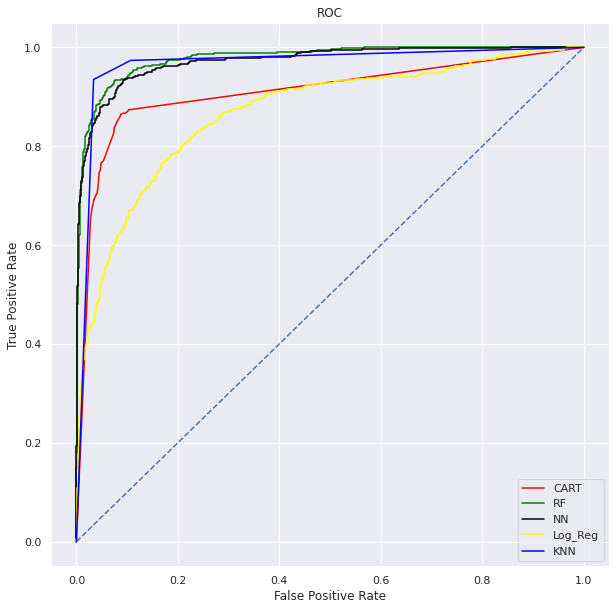

In [448]:
plt.figure(figsize=(10,10));
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.plot(lr_test_fpr, lr_test_tpr,color='yellow',label="Log_Reg");
plt.plot(knn_test_fpr, knn_test_tpr,color='blue',label="KNN");
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')

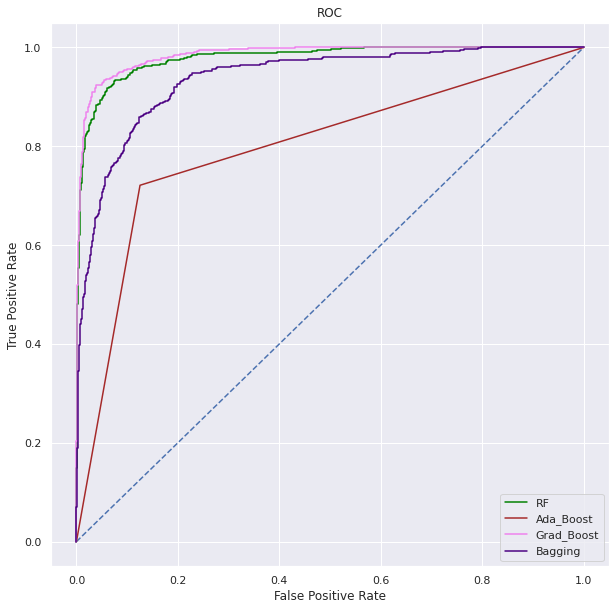

In [449]:
plt.figure(figsize=(10,10));
plt.plot([0, 1], [0, 1], linestyle='--');
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(adb_test_fpr, adb_test_tpr,color='Brown',label="Ada_Boost");
plt.plot(gbcl_test_fpr, gbcl_test_tpr,color='violet',label="Grad_Boost");
plt.plot(bagg_test_fpr, bagg_test_tpr,color='Indigo',label="Bagging");
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC');
plt.legend(loc='lower right');